 <h1><center>Mining for a nice Cpf1</center></h1>



<div style="text-align: right">Lorenzo federico Signorini, 17/07/2019</div>

<div style="text-align: right">Università degli studi di Trento</div>


In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO



sys.path.insert(0, '/home/lorenzo.signorini/utils/')
import filename_discrepancies


dataset="ZellerG_2014" 
tabledir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/3tabellazza" 
CRISPRdir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/1crisprsearch/out"
annodir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/2casanno/crisprcasanno"
datadir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/"


In [3]:
# Extract sequence information from GENOMES WITH <cas9> annotation.
feature="Cpf1"
tabellazza=pd.read_csv(datadir+"/3tabellazza/crisprcas_hits_table.csv", index_col=0)
SGBs=pd.read_excel(datadir+"S4Segata.xlsx")
# OPTIONAL TODO : subsample for a single SGB
#chosen_SGB=15286  # Cibiobacter SGB
#single_SGB=tabellazza[tabellazza["SGB ID"]==chosen_SGB]

#subset_of_genomes=single_SGB 
subset_of_genomes=tabellazza

genomes_with_that_feature=subset_of_genomes[subset_of_genomes.prokka_cas.str.contains(feature)==True]
print("Found ", len(genomes_with_that_feature), " genomes with that feature.")



Found  4524  genomes with that feature.


In [5]:
genome=genomes_with_that_feature.iloc[1,:]
genome

Unnamed: 0.1                                                          128
Genome Name                          AsnicarF_2017__MV_FEM5_t1Q14__bin.31
Study                                                       AsnicarF_2017
Sample Name                                                 MV_FEM5_t1Q14
Assembler                                                      metaSPAdes
Genome Size                                                       2895211
N50                                                                182435
# Contigs                                                              24
Completeness                                                      99.3289
Contamination                                                           0
Strain Heterogeneity                                             0.056823
SGB ID                                                               5117
pilercr_CRISPR          >NODE_13_length_159619_cov_25.2063\tpilercr1.0...
minced_CRISPR           >NODE_13_lengt

In [4]:
featureanno=genome.prokka_cas.split(">")
featureanno.pop(0) #first element is empty for some reason
print("Cas proteins:")
[print(x[:34], x[x.index("Name"):x.index("Name")+11]) for x in featureanno]
print("\nCRISPR arrays: ")
[print(x[:34]) for x in genome.minced_CRISPR.split(">")]

NameError: name 'genome' is not defined

## Feature sequence frome one single genome

In [7]:
dataset=genome.Study
genomename=genome["Genome Name"]#TODO Be careful for filename discrepancies ,e specially with ZeeviD files and with _megahit_ underscores!

path="/scratchCM/tmp_projects/epasolli_darkmatter/allcontigs/"+dataset+"/metabat/genomes_comp50_cont05/prokka/"+genomename    
filename=path+"/"+genomename+".faa"
featurelist=[]
for record in SeqIO.parse(filename, "fasta"):
    if feature in record.description:
        featurelist.append(record.seq)
print(len(featurelist))
print(featurelist[0])

1
MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGIIAEDAVKAENQYTVKEMMDDFYRDFIDRKLDALQGINWEQLFDIMKKVKLDKNDKTSKELDKIQESIRKEIGKIFSSDPIYKDMLKADMISKILPEYIVDKYDDAASRIEAVKVFYGFAGYFIDFWASRKNIFSDTNIASAIPYRIVNENARIHMENITAFNRIAEIAGDEVAEIAEDASAYLQNMSLEDVFTGACYGEFICQKDIDRYNNICGVINQHMNQFCQNKKISRSKFKMERLHKQILCRSESGFEIPVGFQTDGEVIDAINSFSTILEEKDILNRLRTLSQEVTGYDMERIYVSSKAFESVSKYIDHKWDVIASSMYNYFSGAVRGKDDKKDAKIQTEIKKIKSCSLLDLKKLVDMYYKMDGMCLEHEATEYVAGITEILVDFNYKTFDMDDSVKMIQNEQMINEIKEYLDTYMSIYHWAKDFMIDEFVDRDMEFYSELDEIYYDLSDIVPLYNKVRNYVTQKPYSQDKIKLNFGFPTLANGWSKSKEFDNNVVVLLRDEKIYLAILNVGNKPSKDIMAGEDRRRSDTDYKKMNYYLLPGASKTLPHVFISSNAWKKSHGIPDEIMYGYNQNKHLKSSPNFDLEFCHKLIDYYKECIDSYPNYQIFNFKFAATETYNDISAFYKDVERQGYKIEWSYISEDDINQMDRDGQIYLFQIYNKDFAPNSKGMQNLHTMFLKNIFSEENLSDVVIKLNGEAELFFRKSSIQHKRGHKKGSVLVNKTYKTTEKTENGQGEIEVIESLPDQCYMELVKYWSEGGVGQLSEEASKYKDKVSHYAATMDIVKDRRYTEDKFFIHLPITINFKADNRNNVNEKVLKFIAENDDLHVIGIDRGERNLLYVSVIDSRGRIVEQKSFNIVENHESSKNVIRRHDYKGKLVNKEKYRNEARKSWKEIGKIKEIKEGYLSQVIHEISKLVLKYNAIIVMEDLNYGFKRGRFKVERQVYQKFET

##  Extracting feature for all genomes

In [5]:
for index, genome in genomes_with_that_feature.iterrows():
    print("\n-----------------------------------------------------\nGenome Name:\t",genome["Genome Name"],"\n-----------------------------------------------------\n")
    print("Cas proteins:")
    lista=genome.prokka_cas.split(">")
    lista.pop(0)
    [print(x[:34], x[x.index("Name"):x.index("Name")+11]) for x in lista]
    print("\nCRISPR arrays: ")
    if not type(genome.minced_CRISPR)==float:
        [print(x[:30]) for x in genome.minced_CRISPR.split(">")]
    else:
        print("None")


-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEM4_t1Q14__bin.2 
-----------------------------------------------------

	 NODE_145_length_37113_cov_85.6201	 Name=cas2;g
	 NODE_145_length_37113_cov_85.6201	 Name=cas1;g
	 NODE_145_length_37113_cov_85.6201	 Name=cpf1;g
	 
	 NODE_145_length_37113_cov_85.6

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEM5_t1Q14__bin.31 
-----------------------------------------------------

	 NODE_13_length_159619_cov_25.2063	 Name=cas2;g
	 NODE_13_length_159619_cov_25.2063	 Name=cas1-1
	 NODE_13_length_159619_cov_25.2063	 Name=cpf1;g
	 
	 NODE_13_length_159619_cov_25.2

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEM5_t3Q15__bin.31 
-----------------------------------------------------

	 NODE_4_length_125474_cov_17.4211	P Name=cas2;g
	 NODE_4_length_125474_cov_17.4211	P Name=cas1-1
	 NODE_4_length_125474_cov_17.4211	P Name=cpf1;g
	 

ValueError: substring not found

# TODO da rifare col filename discrepancies funzionante
### Print all the Sequences in all the genomes

In [6]:
features={}
featuresdf=pd.DataFrame(columns=["Genome Name", "SGB ID", "Seq ID", "Seq Description", "Seq"])
for index, genome in genomes_with_that_feature.iterrows():
    dataset=genome.Study
    genomename=genome["Genome Name"] #TODO Be careful for filename discrepancies, especially with ZeeviD files and with _megahit_ underscores!
    SGB=genome["SGB ID"]
    print("\n-----------------------------------------------------\nGenome Name:\t",genome["Genome Name"],"\n-----------------------------------------------------\n")

    
    
    ######################################################################
    # take into account filename discrepancies
    if dataset.startswith("ZeeviD"):
                   
             genomename=filename_discrepancies.change_to_megahit(genomename)
             try:
                 genomename=genomename.replace("ZeeviD_2015", "ZeeviD_2015_B")
                 prokkafile_ofsample=open(annodir+"/justminced/ZeeviD_2015_B/"+genomename+".crisprcas.gff.minced")
                 prokkafile_ofsample.close()
                 dataset="ZeeviD_2015_B"
             except:
                 genomename=genomename.replace("ZeeviD_2015_B", "ZeeviD_2015_A")
                 dataset="ZeeviD_2015_A"
    if filename_discrepancies.dataset_has_megahit(dataset,genomename):
        genomename=filename_discrepancies.change_to_megahit(genomename)
    ########################################################################

    path="/scratchCM/tmp_projects/epasolli_darkmatter/allcontigs/"+dataset+"/metabat/genomes_comp50_cont05/prokka/"+genomename    
    filename=path+"/"+genomename+".faa"
    for record in SeqIO.parse(filename, "fasta"):
        if feature in record.description:
            idd=record.id
            descr=record.description
            seq=record.seq
            features[(genomename, idd, descr, SGB)]=seq
            featuresdf.loc[index]=pd.Series({"Genome Name":genomename, "SGB ID":SGB, "Seq ID":idd, "Seq Description":descr, "Seq":seq})
            print(record.seq)
    
    
    mincedCRISPRfilename=CRISPRdir+"/"+dataset+"/"+genomename+".fa.minced.out"
    
    f=open(mincedCRISPRfilename, "r")
    for line in f.readlines():
        print(line)
    f.close()


-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEM4_t1Q14__bin.2 
-----------------------------------------------------

MAKNFEDFKRLYPLSKTLRFEAKPIGATLDNIVKSGLLDEDEHRAASYVKVKKLIDEYHKVFIDRVLADGCLPLKNEGHNNSLTEYYDNYVSKSQNEDAKKAFEENLQNLRSIIAKKLTEDKAYANLFGKNLIESYKDKTDKTKIIDSDLFKFINTAESTQLDSMSQDEAKEIVKEFWGFTTYFVGFFDNRKNMYTAEEKSTGIAYRLINENLPKFIDNMEAFKKAIARTEIQANMDELYSNFSEYLNVESIQEMFQLDYYNMLLTQKQIDVYNAIIGGKTDDEHDVKIKGINEYINLYNQQHKDDKLPKLKALFKQILSDRNAISWLPEEFNSDQEVLNAIKDCYERLSENVLGDKVLKSLLGSLADYSLDGIFIRNDLQLTDISQKIFGNWGVIQNAIMQNIKRVAPARKHKESEEDYEKRIAGIFKKADSFSISYINDCLNEADPNNAYFVENYFATFGAVNTPTMQRENLFALVQNAYTEVAALLHSDYPTVKHLAQDKANVSKIKALLDAIKSLQHFVKPLLGKGDESDKDERFYGELASLWAELDTVTPLYNMIRNYMTRKPYSQKKIKLNFENPQLLGGWDANKEKDYATIILRRNGLYYLAIMDKDTRKLLGKAMPSDGECYEKMVYKFFKDVTTMIPKCSTQLKDVQAYFKVNTDDYVLNSKAFNKPLTITKEVFDLNNVLYGKYKKFQKGYLTATGDNVGYTHAVNVWIKFCMDFLNSYDSTCIYDFSSLKPESYLSLDAFYQDANLLLYKLSFARASVSYINQLVEEGKMYLFQIYNKDFSEYSKGTPNMHTLYWKALFDERNLADVVYKLNGQAEMFYRKKSIENTH

MPININKFSDECRKIDFFTDLYNIQKTLRFSLIPIGATADNFDFKDRLSKEKDLLDSAKRIKEYISKYLADESDKCLSQPIKLKHLDEYYELYITKDRDEQKFKSAEEKLRKELADFLKEILKRLNKKILNDYLPEYLEDDEKALEDIANLSSFSTYFNSYYDNCKNMYTDKEQSTAIPYRCINDNLPKFIDNIKAYEKVLEELKPSDLEELRNNFKGVYDTTVDDMFTLDYFNCVLSQSGIDTYNAIIGNDKVKGINEYINLHNQTAQQGHKVPNLKRLYKQIGSQKKTISFLPGKFESDNELLKAVYDFYNTGNAEKNFTALKDTITELEKIFDNLAEYNLDGVFVRNDISLTNLSQNMFNDWSVFRNLWNDRYDKVNNPEKAKDIDKYNDKRRNVYKKSESFSINQLQDLIATSLEENINSKKITDYFSCDFHRCTAEVENKYQLVKELLSTDYPENKSLKTSEKDVALIKDFLDSVKSLESFVKILTGTGKESGKDELFYGNFTKWFDQLRYIDKLYDKVRNYITEKPYSLDKIKLSFDNPQFLGGWQHSKETDYSAQLFMKDGLYYLGVMDKETKREFKTQYNAPENDSDTMVKIEYNQIPNPGRVIQNLMLVDGKIVKKNGRKNADGVNVVLEELKNQYLPENINRIRKTESYKTTSDNFNKDNLKEYLEYYIARTKEYYCKYNFVFKSADEYGSFNEFVDDVNNQAYQITKVKVSEKQLLSLVEQGKLYLFQIYNKDFSEYSKGKKNLHTMYFQMLFDDRNLENLVYKLQGGAEMFYRPASIKTDSEFQHDANVEIIKRTCEDKVKDKDNPTDDEKAKYYSKFNYEIVKNKRFTKPQFSLHLTLAMNCNQPDHYWLNNSVRELLKKSNKNNIIGIDRGERNLIYVTIINSDGVIVDQINFNIIENSYNGKKYKTDYQKKLNIREKERQEARKTWKTIETIKELKDGYISQVVHQICKLIVQYDAIVVMENLNGGFKRGRTKVEKQVYQKFETM

Sequence 'NODE_283_length_58265_cov_4.32843' (58265 bp)



CRISPR 1   Range: 4646 - 4997

POSITION	REPEAT				SPACER

--------	------------------------------------	---------------------------

4646		GTTAAGTAATATAGAATAATTTCTACTGTTGTAGAT	GTTGATACCAACAATCTTGTATGTTCAT	[ 36, 28 ]

4710		GTTAAGTAATATAGAATAATTTCTACTGTTGTAGAT	ATCTGCTCGATACGTTCCTTAATTTCT	[ 36, 27 ]

4773		GTTAAATAATATAGAATAATTTCTACTGTTGTAGAT	GCGAGCCAATTAACAGAGGTTCAAAAC	[ 36, 27 ]

4836		GTTAAGTAATATAGAATAATTTCTACTGTTGTAGAT	AGACGAACACATAGAAGAGAGACTAACT	[ 36, 28 ]

4900		GTTAAGTAGTATAGAATAATTTCTACTGTTGTAGAT	TCAGAAGCATATGATGGAGTACTTGA	[ 36, 26 ]

4962		GTTAAGTAATATAGAATAATTTCTACGGTTGTAGAT	

--------	------------------------------------	---------------------------

Repeats: 6	Average Length: 36		Average Length: 27



Time to find repeats: 72 ms






-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID12_M__bin.31 
-----------------------------------------------------

MNNGTNNFQNFIGISSLQKTLRNALIPTET

Sequence 'NODE_57_length_112823_cov_12.5651' (112823 bp)



CRISPR 1   Range: 15574 - 15867

POSITION	REPEAT				SPACER

--------	------------------------------------	----------------------------

15574		ATCTACACTAGTAGAAATTCTTTCTTATTATTTAAC	CCGGTAACCACATAGGCTATACCCACAT	[ 36, 28 ]

15638		ATCTACACTAGTAGAAATTCTTTCTTATTATTTTAT	TTAACAATAAAAAAATCACTAAGCACCACTTAA	[ 36, 33 ]

15707		ATCTACACTAGTAGAAATTTTTTCTTATTATTTAAC	CGTGACAGCAATATAGGGTGTTTCAC	[ 36, 26 ]

15769		ATCTACACTAGTAGAAATTCTTTCTTATTATTTAAC	TATCGACACATCTATCAGTCAACCGTG	[ 36, 27 ]

15832		ATCTACACTAGTAGAAATTCTTTCTTATTATTTAAC	

--------	------------------------------------	----------------------------

Repeats: 5	Average Length: 36		Average Length: 28



Time to find repeats: 96 ms






-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_M__bin.40 
-----------------------------------------------------

MNIYENFTNMYQVNKTIRMGLKPICKTDENIAKFLEEDKERSEKYKIAKKIIDKENRAFIEDRLKDFSISGLDEYLELLKQKKDITKIQKKMRDEIS

Sequence 'NODE_55_length_119950_cov_16.5392' (119950 bp)



CRISPR 1   Range: 77566 - 78357

POSITION	REPEAT				SPACER

--------	------------------------------------	---------------------------

77566		TTTAAGGGTATGCGGAATTATTTAGGTTACTTAAAC	TATGCCAGACAATATCAAATCACTTATC	[ 36, 28 ]

77630		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	GATGAATTACCACGAAAGAGTGGAGTT	[ 36, 27 ]

77693		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	ATTAATCTGCTCTCTTTCGCCTTTTTCA	[ 36, 28 ]

77757		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	TTCTACTTATATCTACTTTAGGTATAT	[ 36, 27 ]

77820		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	TTGTGTATTCTGTTCAACATCATTTG	[ 36, 26 ]

77882		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	CCTCATACATAATCTGAGGTCTTATA	[ 36, 26 ]

77944		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	ATTCAGTGAAAAAAAGCCTCCTGTGT	[ 36, 26 ]

78006		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	AACCTTAAAGGCGCTACCAACACTTG	[ 36, 26 ]

78068		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	CTAATTATGATGTTATCAACGCAGAAGT	[ 36, 28 ]

78132		ATCTACAATAGTAGAAATTATTTAGGTTACTTAAAC	ATGTAC

MVGNKISNSFDSFTGINALSKTLRNELIPSDYTKRHIAESDFIAADTNKNEDQYVAKEMMDDYYRDFISKVLDNLHDIEWKNLFELMHKAKIDKSDATSKELIKIQDMLRKKIGKKFSQDPEYKVMLSAGMITKILPKYILEKYETDREDRLEAIKRFYGFTVYFKEFWASRQNVFSDKAIASSISYRIIHENAKIYMDNLDAYNRIKQIACEEIEKIEEEAYVFLQGDQLDVVYTEEAYGRFISQSGIDLYNNICGVINAHMNLYCQSKKCSRSKFKMQKLHKQILCKAETGFEIPLGFQDDAQVINAINSFNALIKEKNIISRLRTIGKSISLYDVNKIYISSKAFENVSVYIDHKWDVIASSLYKYFSEIVKGNKDNREEKIQKEIKKVKSCSLGDLQRLVNSYYKIDSTCLEHEVTEFVTKIIDEIDNFQITDFKFNDKISLIQNEQIVMDIKTYLDKYMSIYHWMKSFVIDELVDKDMEFYSELDELNEDMSEIVNLYNKVRNYVTQKPYSQEKIKLNFGSPTLADGWSKSKEFDNNAIILIRDEKIYLAIFNPRNKPAKTVISGHDVCNSETDYKKMNYYLLPGASKTLPHVFIKSRLWNESHGIPDEILRGYELGKHLKSSVNFDVEFCWKLIDYYKECISCYPNYKAYNFKFADTESYNDISEFYREVECQGYKIDWTYISSEDVEQLDRDGQIYLFQIYNKDFAPNSKGMDNLHTKYLKNIFSEDNLKNIVIKLNGEAELFYRKSSVKKKVEHKKGTILVNKTYKVEDNTENSKEKRVIIESVPDDCYMELVDYWRNGGIGILSDKAVQYKDKVSHYEATMDIVKDRRYTVDKFFIHLPITINFKADGRININEKVLKYIAENDELHVIGIDRGERNLLYVSVINKKGKIVEQKSFNMIESYETVTNIVRRYNYKDKLVNKESARTDARKNWKEIGKIKEIKEGYLSQVIHEISKMVLKYNAIIVMEDLNYGFKRGRFRVERQVYQKFENM

MNGNRSIVYREFVGVIPVAKTLRNELRPVGHTQEHIIQNGLIQEDELRQEKSTELKNIMDDYYREYIDKSLSGVTDLDFTLLFELMNLVQSSPSKDNKKALEKEQSKMREQICTHMQSDSNYKNIFNAKFLKEILPDFIKNYNQYDAKDKAGKLETLALFNGFSTYFTDFFEKRKNVFTKEAVSTSIAYRIVHENSLTFLANMTSYKKISEKALDEIEVIEKNNQDKMGDWELNQIFNPDFYNMVLIQSGIDFYNEICGVVNAHMNLYCQQTKNNYNLFKMRKLHKQILAYTSTSFEVPKMFEDDMSVYNAVNAFIDETEKGNIIGKLKDIVNKYDELDEKRIYISKDFYETLSCFMSGNWNLITGCVENFYDENIHAKGKSKEEKVKKAVKEDKYKSINDVNDLVEKYIDEKERNEFKNSNAKQYIREISNIITDTETAHLEYDEHISLIESEEKADEMKKRLDMYMNMYHWAKAFIVDEVLDRDEMFYSDIDDIYNILENIVPLYNRVRNYVTQKPYNSKKIKLNFQSPTLANGWSQSKEFDNNAIILIRDNKYYLAIFNAKNKPDKKIIQGNSDKKNDNDYKKMVYNLLPGANKMLPKVFLSKKGIETFKPSDYIISGYNAHKHIKTSENFDISFCRDLIDYFKNSIEKHAEWRKYGFKFSATDSYNDISEFYREVEMQGYRIDWAYIGEADINKLDEEGKIYLFQIYNKDFAENSTGKENLHTMYFKNIFSEENLKNIVIKLNGQAELFYRKASVKNPVKHKKDSVLVNKTYKNQLDNGDVVRIPIPDDIYNEIYKMYNGYIKESDLSGAAKEYLDKVEVRTAQKEIVKDYRYTVDKYFIHTPITINYKVAARNNVNDMAVKYIAQNDDIHVIGIDRGERNLIYISVIDSHGNIVKQKSYNILNNYDYKKKLVEKEKTREYARKNWKSIGNIKELKEGYISGVVHEIAMLMVEYNAIIAMEDLNYGFKRGRFKVERQVYQKFESMLINKLNYFASK

MNNYDYKKKLVEKEKTREYARKNWKSIGNIKELKEGYISGVVHEIAMLMVEYNAIIAMEDLNYGFKRGRFKVERQVYQKFESMLINKLNYFASKGKSVDEPGGLLKGYQLTYVPDNIKNLGKQCGVIFYVPAAFTSKIDPSTVFISAFNFKSISTNASRKQFFMQFDEIRYCAEKDMFSFGFDYNNFDTYNITMSKTQWTVYTNGERLQSEFNNARRTGKTKSINLTETIKLLLEDNEINYADGHDVRIDMEKMDEDKNSEFFAQLLSLYKLTVQMRNSYTEAEEQEKGISYDKIISPVINDEGEFFDSDNYKESDDKECKMPKDADANGAYCIALKGLYEVLKIKSEWTEDGFDRNCLKLPHAEWLDFIQNKRYE
Sequence 'NODE_1346_length_21419_cov_8.04536' (21419 bp)



CRISPR 1   Range: 19313 - 19660

POSITION	REPEAT				SPACER

--------	-----------------------------------	---------------------------

19313		TCTACAAAGCAGAAATTATTTAAGGTTATTCAAAC	TTCTTAACACAGCTATATACAAGGGGA	[ 35, 27 ]

19375		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	ATGCAGATTGTCAAAGACGCAGGATAA	[ 35, 27 ]

19437		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	TATGATACGGTTGTTAAGCGTGCGAATA	[ 35, 28 ]

19500		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	ACACAGTGACGAATGTAGCGGATCTA	[ 35, 26 ]

19561		TCTACAAAGTAGAAATTATTTAAAGTTATTCAAAC	ACATGTAAATGTTTTCTGATGAAGTTAGAA	[ 35, 30 ]

19626		TCTA

Sequence 'NODE_4_length_325631_cov_13.7277' (325631 bp)



CRISPR 1   Range: 9857 - 10945

POSITION	REPEAT				SPACER

--------	------------------------------------	-----------------------------

9857		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	CCCCGAGGTAATGCGGACAGTCAGACGGT	[ 36, 29 ]

9922		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	AATATGCACAATATTAAAAGGTGATATAAT	[ 36, 30 ]

9988		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	TATACGGCTATTGATGCCCCGTATCGACT	[ 36, 29 ]

10053		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	ATAAAGCACGGAGAAAAACTGCAAGCCGTA	[ 36, 30 ]

10119		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	ATCAATAATGTAATGAACATCTTTCTTGCT	[ 36, 30 ]

10185		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	ATTTATGGGTAAATGTAAAACAGAAAATGG	[ 36, 30 ]

10251		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	CCATTTACAATGTCCAAACAGAGGACAGT	[ 36, 29 ]

10316		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	ACCGTGACTCTGTCCCCCTGGGTTGAGCG	[ 36, 29 ]

10381		GTTTGAGAATAGTGTAAATCTATAAGGTAGTAAAAC	GGCTATAACGGCGCCGGCTCAAATCGAACA	[ 36, 30 ]

10447		GTTTGAGAATAGTGTAAATCTA

Sequence 'NODE_39_length_101393_cov_5.67981' (101393 bp)



CRISPR 1   Range: 100475 - 100971

POSITION	REPEAT				SPACER

--------	------------------------------------	-----------------------------

100475		TGCTTTTTACCATTCAAAATAACATACTCCTAAAAC	CCTCATACTGCCCTATATGCAGTAGTGTCG	[ 36, 30 ]

100541		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	TTAAAGCCTGTGAGCATACTGTTGTTCATA	[ 36, 30 ]

100607		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	GTGTAGTCACCCATATTATTAATACGGAT	[ 36, 29 ]

100672		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	TTGAACTTTGGACTAATCCGAATGACATTG	[ 36, 30 ]

100738		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	AACGTCATTACTGCAATTGCACCTTCGCCT	[ 36, 30 ]

100804		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	CTATTGGAATATTCAGCAGCTTCTTCAAGT	[ 36, 30 ]

100870		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	CTAAATTTAGGGTTATCCACATAATTATGT	[ 36, 30 ]

100936		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	

--------	------------------------------------	-----------------------------

Repeats: 8	Average Length: 36		Average Length: 29



Time to f

MNNVTGDFSEFVAISKVQKTLRNELRPTPLTMKHIKQKGIITEDEYKTQQSLELKRIADGYYRDYITHKLNDTNNLDFRNLFEAIEEKYKKNDKDNRDKLDLVEKSKRGEIAKLLSADDNFKSMFEAKLITQLLPVYVEQNYIGEDKEKALETIALFKGFTTYFTDYFNIRKNMFKENGGASSICYRIVNVNASIFYDNLKTFMCIKEKAETEIALIEEELTELLDSWRLEHIFSEDYYNELLAQKGIDYYNQICGDVNKHMNLYCQQNKLKANVFKMTKLQKQIMGISEKAFEIPPMYQNDEEVYAAFNGFISRLEEVKLIDRLGNVLQNSNIYDTAKIYINARCYTNVSSYVYGGWGVIESAIERYWYNTIAGKGQSKAKKIEKAKKDNKFMSVKELDSIVSDYEPDYFNASNMDDDNSGRAFSGHGVLGYFNKMSKLLANMSLHTITYDSGDSLIENKETALNIKKDLDDIMSIYHWLQTFIIDEVVEKDNAFYAELEDIYYELENVVTLYDRIRNYVTRKPYSTQKFKLNFASPTLASGWSRSKEFDNNAIILLRNNKYYIAIFNVNNKPDKQIIKGSEEQRLSTDYKKMVYNLLPGPNKMLPWVFIKSNTGKRDYNPSSYILEGYEKNRHIKSSGNFDINYCHDLIDYYKACINKHPEWKNYGFKFKETTQYNDIGQFYKDVEKQGYSISWAYISEADINRLDEEGKIYLFEIYNKDLSSHSTGKDNLHTMYLKNIFSEDNLKNICIELNGNAELFYRKSSMKRNITHKKDTVLVNKTYINEAGVRVSLTDEDYIKVYNYYNNDYVIDVEKDKKLVEILERIGHRKNPIDIIKDKRYTEDKYFLHFPITINYGVDDENINAKMIEYIAKHNNMNVIGIDRGERNLIYISVINNKGNIIEQKSFNLVNNYDYKNKLKNMEKTRDNARKNWQEIGKIKDVKNGYLSGVISKIARMVVDYNAIIVMEDLNRGFKRGRFKVERQVYQKFENMLISKLNY

Sequence 'NODE_22_length_147671_cov_8.79458' (147671 bp)



CRISPR 1   Range: 59371 - 59579

POSITION	REPEAT				SPACER

--------	-----------------------	---------------------------------------

59371		CTTGCTCATCCCCTTTGGACTTC	AGCATACCTTAACTCCGCTTCAACATCCAATCCACCGTG	[ 23, 39 ]

59433		CTTGCTCATCCCTTTTGGACTTC	CTTATGCCTTCCCGCTCCTTCAATGTCCAATCTGCCGCT	[ 23, 39 ]

59495		CTTGCTCATCCCTTTTGGACTTC	AGCATACCTTAACTCCGCTTCAACATCCAATCCACCGTG	[ 23, 39 ]

59557		CTTGCTCATCCCTTTTGGACTTC	

--------	-----------------------	---------------------------------------

Repeats: 4	Average Length: 23		Average Length: 39



Time to find repeats: 215 ms





Sequence 'NODE_499_length_35864_cov_9.15049' (35864 bp)



CRISPR 2   Range: 16131 - 17736

POSITION	REPEAT				SPACER

--------	------------------------------	-----------------------------------

16131		GAATTAATAGATACATAGTGGGATGTAAAT	AATCTTATAAGAGTATGCTCTATATACTTTTTG	[ 30, 33 ]

16194		GAATTAATAGATACATAGTGGGATGTAAAT	AAAATCTGCACTAGCAGTATATGATGATGTAACCTTG	[ 30, 3

MIEYIAKHNNMNVIGIDRGERNLIYISVINNKGNIIEQKSFNLVNSYDYKNKLKNMEKTRDNARKNWQEIGKIKDVKSGYLSGVISKIARMVIDYNAIIVMEDLNKGFKRGRFKVERQVYQKFENMLISKLNYLVFKERKADENGGILRGYQLTYIPKSIKNVGKQCGCIFYVPAAYTSKIDPATGFINIFDFKKYSGSGINAKVKDKKEFLMSMNSIRYINEGSEEYEKIGHRELFAFSFDYNNFKTYNVSSPVNEWTAYTYGERIKKLYKDGRWLRSEVLNLTENLIKLMEQYNIEYKDGHDIREDISHMDETRNADFICSLFEELKYTVQLRNSKSEAEDENYDRLVSPILNSSNGFYDSSDYMENENNTTHTMPKDADANGAYCIALKGLYEINKIKQNWSDDKKFKENELYINVTEWLDYIQNRRFE
MSLYHWLQTFIIDEVVEKDNAFYAELEDICCELENVVTLYDRIRNYVTKKPYSTQKFKLNFASPTLAAGWSRGKEFDNNAIILLRNNKYYIAIFNVNNKPDKQIIKGSEEQRLSTDYKKMVYNLLPGPNKMLPKVFIKSDTGKRDYNPSSYILEGYEKNRHIKSSGNFDINYCHDLIDYYKACINKHPEWKNYGFKFEETPQYNDIGQFYKDVEKQGYSISWVYISEADINRLDEEGKIYLFEIYNKDLSSHSTGKDNIHTMYLKNIFSEDNLKNICIELNGNAELFYRKSSMKRNITHKKDTVLVNKTYINEAGVRVSLTDEDYIKVYNYYNNDYVIDVEKDKKLVEILERIGHRKNPIDIIKDKRYTEDKYFLHLPNNN
Sequence 'NODE_964_length_5143_cov_2.00157' (5143 bp)



CRISPR 1   Range: 1 - 603

POSITION	REPEAT				SPACER

--------	-----------------------------------	----------------------------


MQERKKISHLTHRNSVQKTIRMQLNPVGKTMDYFQAKQILENDEKLKEDYQKIKEIADRFYRNLNEDVLSKTGLDKLKDYAEIYYHCNTNTDRKRLDECASELRKEIVKNFKNRDEYNKLFNKRMIEIVLPQHLKNEDEKEVVASFKNFTTYFTGFFTNRKNMYSDGEESTAIAYRCINENLPKHLDNVKAFEKAISKLSKNAIDDLDATYSGLCGTNLYDVFTVDYFNFLLPQSGITEYNKIIGGYTTSDGTKVKGINEYINLYNQQVSKRDKIPNLKILYKQILSESEKVSFIPPKFEDDNELLSAVSEFYANDETFDGMPLKKAIDETKLLFGNLDNSSLNGIYIQNDRSVTNLSNSMFGSWSVIEDLWNKNYDSVNSNSRIKDIQKREDKRKKAYKAEKKLSLSFLQVLISNSENDEIREKSIVDYYKTSLMQLTDNLSDKYNEAAPLLNENYSNEKGLKNDDKSISLIKNFLDAIKEIEKFIKPLSETNITGEKNDLFYSQFTPLLDNISRIDILYDKVRNYVTQKPFSTDKIKLNFGNSQLLNGWDRNKEKDCGAVWLCKDEKYYLAIIDKSNNSILENIDFQDCDESDCYEKIIYKLLPGPNKMLPKVFFSEKCKKLLSPSDEILKIRKNGTFKKGDKFSLDDCHKLIDFYKESFKKYPNWLIYNFKFKNTNEYNDISEFYNDVASQGYNISKMKIPTTFIDKLVDEGKIYLFQLYNKDFSPHSKGTPNLHTLYFKMLFDERNLEDVVYKLNGEAEMFYRPASIKYDKPTHPKNTPIKNKNTLNDKKASTFPYDLIKDKRYTKWQFSLHFPITMNFKAPDRAMINDDVRNLLKSCNNNFIIGIDRGERNLLYVSVIDSNGTIIYQHSLNIIGNKFKGKTYETNYREKLATREKERTEQRRNWKAIESIKELKEGYISQAVHVICQLVVKYDAIIVMEKLTDGFKRGRTKFEKQVYQKFEKMLIDKLNYYVDKKLDPDEEGGLLHAYQLTNKLE

MVGNKISNSFDSFTGINALSKTLRNELIPSDYTKRHIAESDFIAADTNKNEDQYVAKEMMDDYYRDFISKVLDNLHDIEWKNLFELMHKAKIDKSDATSKELIKIQDMLRKKIGKKFSQDPEYKVMLSAGMITKILPKYILEKYETDREDRLEAIKRFYGFTVYFKEFWASRQNVFSDKAIASSISYRIIHENAKIYMDNLDAYNRIKQIACEEIEKIEEEAYVFLQGDQLDVVYTEETYGRFISQSGIDLYNNICGVINAHMNLYCQSKKCSRSKFKMQKLHKQILCKAETGFEIPLGFQDDAQVINAINSFNALIKEKNIISRLRTIGKSISLYDVNKIYISSKAFENVSVYIDHKWDVIASSLYKYFSEIVKGNKDNREEKIQKEIKKVKSCSLGDLQRLVNSYYKIDSTCLEHEVTEFVTKIIDEIDNFQITDFKFNDKISLIQNEQIVMDIKTYLDKYMSIYHWMKSFVIDELVDKDMEFYSELDELNEDMSEIVNLYNKVRNYVTQKPYSQEKIKLNFGSPTLADGWSKSKEFDNNAIILIRDEKIYLAIFNTRNKPAKTVISGHDVCNSETDYKKMNYYLLPGASKTLPHVFIKSRLWNESHGIPDEILRGYELGKHLKSSVNFDVEFCWKLIDYYKECISCYPNYKAYNFKFADTESYNDISEFYREVECQGYKIDWTYISSEDVEQLDRDGQIYLFQIYNKDFAPNSKGMDNLHTKYLKNIFSEDNLKNIVIKLNGEAELFYRKSSVKKKVEHKKGTILVNKTYKVEDNTENSKEKRVIIESVPDDCYMELVDYWRNGGIGILSDKAVQYKDKVSHYEATMDIVKDRRYTVDKFFIHLPITINFKADGRININEKVLKYIAENDELHVIGIDRGERNLLYVSVINKKGKIVEQKSFNMIESYETVTNIVRRYNYKDKLVNKESARTDARKNWKEIGKIKEIKEGYLSQVIHEISKMVLKYNAIIVMEDLNYGFKRGRFRVERQVYQKFENM

MNYKTGLEDFIGKESLSKTLRNALIPTESTKIHMEEMGVIRDDELRAEKQQELKEIMDDYYRTFIEEKLGQIQGIQWNSLFQKMEETMEDISVRKDLDKIQNEKRKEICCYFTSDKRFKDLFNAKLITDILPNFIKDNKEYTEEEKAEKEQTRVLFQRFATAFTNYFNQRRNNFSEDNISTAISFRIVNENSEIHLQNMRAFQRIEQQYPEEVCGMEEEYKDMLQEWQMKHIYSVDFYDRELTQPGIEYYNGICGKINEHMNQFCQKNRINKNDFRMKKLHKQILCKKSSYYEIPFRFESDQEVYDALNEFIKTMKKKEIIRRCVHLGQECDDYDLGKIYISSNKYEQISNALYGSWDTIRKCIKEEYMDALPGKGEKKEEKAEAAAKKEEYRSIADIDKIISLYGSEMDRTISAKKCITEICDMAGQISIDPLVCNSDIKLLQNKEKTTEIKTILDSFLHVYQWGQTFIVSDIIEKDSYFYSELEDVLEDFEGITTLYNHVRSYVTQKPYSTVKFKLHFGSPTLANGWSQSKEYDNNAILLMRDQKFYLGIFNVRNKPDKQIIKGHEKEEKGDYKKMIYNLLPGPSKMLPKVFITSRSGQETYKPSKHILDGYNEKRHIKSSPKFDLGYCWDLIDYYKECIHKHPDWKNYDFHFSDTKDYEDISGFYREVEMQGYQIKWTYISADEIQKLDEKGQIFLFQIYNKDFSVHSTGKDNLHTMYLKNLFSEENLKDIVLKLNGEAELFFRKASIKTPIVHKKGSVLVNRSYTQTVGNKEIRVSIPEEYYTEIYNYLNHIGKGKLSSEAQRYLDEGKIKSFTATKDIVKNYRYCCDHYFLHLPITINFKAKSDVAVNERTLAYIAKKEDIHIIGIDRGERNLLYISVVDVHGNIREQRSFNIVNGYDYQQKLKDREKSRDAARKNWEEIEKIKELKEGYLSMVIHYIAQLVVKYNAVVAMEDLNYGFKTGRFKVERQVYQKFETMLIEKLHYLVFKDREVCEEG

Sequence 'NODE_59_length_126905_cov_8.77265' (126905 bp)



CRISPR 1   Range: 9323 - 9928

POSITION	REPEAT				SPACER

--------	------------------------------------	---------------------------

9323		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	TTCGTTTTCAAGCCACTCACAGCCTT	[ 36, 26 ]

9385		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	GCTGACGAACAGAGGAGAATACCCTTT	[ 36, 27 ]

9448		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	GCTGACGAACAGAGGAGAATACCCTTT	[ 36, 27 ]

9511		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	TCAAGGCTCGTTGAAGTACCAACAAT	[ 36, 26 ]

9573		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	CGTGATAGTAAGGCTTCGTTAGGTAAAT	[ 36, 28 ]

9637		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	AGTAAACACACAAAAGCAACCACTCTCCGAT	[ 36, 31 ]

9704		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	AATGTCAAATGACACCTTGAGCAGAAG	[ 36, 27 ]

9767		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	CTGACGATTTGCGAGACCTTGAATACT	[ 36, 27 ]

9830		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	ATTAATGCCGATAGCCGACATAATATT	[ 36, 27 ]

9893		ATCTACAACAGTAGAAATTATTCTATATTACTTAAC	

--------	---

MNNGTNNFQNFIGISSLQKTLRNALIPTETTQQFIVKNGIIKEDELRGENRQILKDIMDDYYRGFISETLSSIDDIDWTSLFEKMEIQLKNGDNKDTLIKEQAEKRKAIYKKFADDDRFKNMFSAKLISDILPEFVIHNNNYSASEKEEKTQVIKLFSRFATSFKDYFKNRANCFSADDISSSSCHRIVNDNAEIFFSNALVYRRIVKNLSNDDINKISGDIKDSLKEMSLEEIYSYEKYGEFITQEGISFYNDICGKVNSFMNLYCQKNKENKNLYKLRKLHKQILCIADTSYEVPYKFESDEEVYQSVNGFLDNISSKHIVERLRKIGDNYNGYNLDKIYIVSKFYESVSQKTYRDWETINTALEIHYNNILPGNGKSKADKVKKAVKNDLQKSITEINELVSNYKLCPDDNIKAETYIHEISHILNNFEAQELKYNPEIHLVESELKASELKNVLDVIMNAFHWCSVFMTEELVDKDNNFYAELEEIYDEIYTVISLYNLVRNYVTQKPYSTKKIKLNFGIPTLADGWSKSKEYSNNAIILMRDNLYYLGIFNAKNKPDKKIIEGNTSENKGDYKKMIYNLLPGPNKMIPKVFLSSKTGVETYKPSAYILEGYKQNKHLKSSKDFDITFCHDLIDYFKNCIAIHPEWKNFGFDFSDTSTYEDISGFYREVELQGYKIDWTYISEKDIDLLQEKGQLYLFQIYNKDFSKKSTGNDNLHTMYLKNLFSEENLKDIVLKLNGEAEIFFRKSSIKNPIIHKKGSILVNRTYEAEEKDQFGNIQIVRKTIPENIYQELYKYFNDKSDKELSDEAAKLKNVVGHHEAATNIVKDYRYTYDKYFLHMPITINFKANKTSFINDRILQYIAKEKNLHVIGIDRGERNLIYVSVIDTCGNIVEQKSFNIVNGYDYQIKLKQQEGARQIARKEWKEIGKIKEIKEGYLSLVIHEISKMVIKYNAIIAMEDLSYGFKKGRFKVERQVYQKFETMLINKLNYLVFKDIS

MNGNRIIVYREFVGVTPVAKTLRNELRPIGHTQEHIIHNGLIQEDELRQEKSTELKNIMDDYYREYIDKSLSGVTDLDFTLLFELMNLVQSSPSKDNKKALEKEQSKMREQICTHLQSDSNYKNIFNAKFLKEILPDFIKNYNQYDAKDKAGKLETLALFNGFSTYFTDFFEKRKNVFTKEAVSTSIAYRIVHENSLTFLANMTSYKKISEKALDEIEVIEKNNQDKMGDWELNQIFNPDFYNMVLIQSGIDFYNEICGVVNAHMNLYCQQTKNNYNLFKMRKLHKQILAYTSTSFEVPKMFEDDMSVYNAVNAFIDETEKGNIIGKLKDIVNKYDELDEKRIYISKDFYETLSCFMSGNWNLITGCVENFYDENIHAKGKSKEEKVKKAVKEDKYKSINDVNDLVEKYIDEKERNEFKNSNAKQYIREISNIITDTETAHLEYNEHISLIESEEKADEIKKRLDMYMNMYHWVKAFIVDEVLDRDEMFYSDIDDIYNILENIVPLYNRVRNYVTQKPYNSKKIKLNFQSPTLANGWSQSKEFDNNAIILIRDNKYYLAIFNAKNKPDKKIIQGNSDKKNDNDYKKMVYNLLPGANKMLPKVFLSKKGIETFKPSDYIISGYNAHKHIKTSENFDISFCRDLIDYFKNSIEKHAEWRKYEFKFSATDSYNDISEFYREVEMQGYRIDWTYISEADINKLDEEGKIYLFQIYNKDFAENSTGKENLHTMYFKNIFSEENLKDIIIKLNGQAELFYRRASVKNPVKHKKDSVLVNKTYKNQLDNGDVVRIPIPDDIYNEIYKMYNGYIKENDLSEAAKEYLDKVEVRTAQKDIVKDYRYTVDKYFIHTPITINYKVTARNNVNDMAVKYIAQNDDIHVIGIDRGERNLIYISVIDSHGNIVKQKSYNILNNYDYKKKLVEKEKTREYARKNWKSIGNIKELKEGYISGVVHEIAMLMVEYNAIIAMEDLNYGFKRGRFKVERQVYQKFESMLINKLNYFASK

MVGNKISNSFDSFTGINALSKTLRNELIPSDYTKRHIAESDFIAADTNKNEDQYVAKEMMDDYYRDFISKVLDNLHDIEWKNLFELMHKAKIDKSDATSKELIKIQDMLRKKIGKKFSQDPEYKVMLSAGMITKILPKYILEKYETDREDRLEAIKRFYGFTVYFKEFWASRQNVFSDKAIASSISYRIIHENAKIYMDNLDAYNRIKQIACEEIEKIEEEAYVFLQGDQLDVVYTEEAYGRFISQSGIDLYNNICGVINAHMNLYCQSKKCSRSKFKMQKLHKQILCKAETGFEIPLGFQDDAQVINAINSFNALIKEKNIISRLRTIGKSISLYDVNNIYISSKAFENVSVYIDHKWDVIASSLYKYFSEIVKGNKDNREEKIQKEIKKVKSCSLGDLQRLVNSYYKIDSTCLEHEVTEFVTKIIDEIDNFQITDFKFNDKISLIQNEQIVMDIKTYLDKYMSIYHWMKSFVIDELVDKDMEFYSELDELNEDMSEIVNLYNKVRNYVTQKPYSQEKIKLNFGSPTLADGWSKSKEFDNNAIILIRDEKIYLAIFNPRNKPAKTVISGHDVCNSETDYKKMNYYLLPGASKTLPHVFIKSRLWNESHGIPDEILRGYELGKHLKSSVNFDVEFCWKLIDYYKECISCYPNYKAYNFKFADTESYNDISEFYREVECQGYKIDWTYISSEDVEQLDRDGQIYLFQIYNKDFAPNSKGMDNLHTKYLKNIFSEDNLKNIVIKLNGEAELFYRKSSVKKKVEHKKGTILVNKTYKVEDNTENSKEKRVIIESVPDDCYMELVDYWRNGGIGILSDKAVQYKDKVSHYEATMDIVKDRRYTVDKFFIHLPITINFKADGRININEKVLKYIAENDELHVIGIDRGERNLLYVSVINKKGKIVEQKSFNMIESYETVTNIVRRYNYKDKLVNKESARTDARKNWKEIGKIKEIKEGYLSQVIHEISKMVLKYNAIIVMEDLNYGFKRGRFRVERQVYQKFENM

MQERKKISHLTHRNSVQKTIRMQLNPVGKTMDYFQAKQILENDEKLKEDYQKIKEIADRFYRNLNEDVLSKTGLDKLKDYAEIYYHCNTNADRKRLNKCASELRKEIVKNFKNRDEYNKLFDKRMIEIVLPKHLKNEDEKEVVASFKNFTTYFTGFFTNRKNMYSDGEESTAIAYRCINENLPKHLDNVKAFEKAISKLSKNAIDDLDATYSGLCGTNLYDVFTVDYFNFLLPQSGITEYNKIIGGYTTSDGTKVKGINEYINLYNQQVSKRDKIPNLQILYKQILSESEKVSFIPPKFEDDNELLSAVSEFYANDETFDGMPLKKAIDETKLLFGNLDNSSLNGIYIQNDRSVTNLSNSMFGSWSVIEDLWNKNYDSVNSNSRIKDIQKREDKRKKAYKAEKKLSLSFLQVLISNSENDEIREKSIVDYYKTSLMQLTDNLSDKYKEAAPLFSENYDNEKGLKNDDKSISLIKNFLDAIKEIEKFIKPLSETNITGEKNDLFYSQFTPLLDNISRIDILYDKVRNYVTQKPFSTDKIKLNFGNSQLLNGWDRNKEKDCGAVWLCKDEKYYLAIIDKSNNSILENIDFQDCDESDCYEKIIYKLLPGPNKMLPKVFFSEKCKKLLSPSDEILKIRKNGTFKKGDKFSLDDCHKLIDFYKESFKKYPNWLIYNFKFKKTNEYNDISEFYNDVASQGYNISKMKIPTSFIDKLVDEGKIYLFQLYNKDFSPHSKGTPNLHTLYFKMLFDERNLEDVVYKLNGEAEMFYRPASIKYDKPTHPKNAPIKNKNTLNDKKTSTFPYDLIKDKRYTKWQFSLHFPITMNFKSPDRAMINDDVRNLLKSCNNNFIIGIDRGERNLLYVSVIDSNGAIIYQHSLNIIGNKFKGKTYETNYQEKLATREKERTEQRRNWKAIESIKELKEGYISQAVHVICQLVVKYDAIIVMEKLTDGFKRGRTKFEKQVYQKFEKMLIDKLNYYVDKKLDPDEEGGLLHAYQLTNKLE

MIVKYKAIVVLENLNVGFKRMRGGIAERSVYQQFEKALIDKLNYLVFKDEEQSGYGGVLNAYQLTDKFESFSKMGQQTGFLFYVPAAYTSKIDPLTGFITPFSWKHVKNREDRRNFLNLFSKLYYDVNTHDFVLAYHHSNKESKYTIKGNWGIADWDILIQENKEVLGKTGTSYCVGKRIVYMDDSTTGHNRMCAYYPHTELKKLLSEYGIEYTSGQDLLKTIQELDDDKLVKGLFYIIKAALQMRNSNSETGEDYISSPIEGRPGICFDSRAEDDTLPHDADANGAFHIAMKGLLLTERIRNDDKLAISNEEWLNYIQEMRG
MTLQEIKEALPKKDIYEEVKKYAMSVVKDYRAGLAESLPGKIETDDERASIKHIMDSMLGLYRFLEYFSHDSIEDTDPVFEEYLDAILDDMNETVPLYNKVRNFSTRKVYSTEKFKLNFNNSSLANGWDKNKEQANGAILLRKEGEYFLGIFNSKNKPKLVSDGGAGIGYEKMIYKQFPDFKKMLPKCTISLKDIKAHFQKSDEDFTLQTDKFEKSIVITKQIYDLGTQTVNGKKKFQVDYPRLTGDMEGYRAALKEWIDFGKEFIQAYTSTAIYDTSLFRDSSDYPDLPSFYKDVDNICYKLTFEWIPDAVIDDCIDAGSLYLFKLHNKDFSAGSIGKPNLHTLYWKALFEEENLSDVVVKLNGQAELFYRPKSLTRPVVHEEGEVIINKTTSTGLPVPDDVYVELSKFVRNGKKGNLTDKAKNWLDKVTVRNTPHAITKDRRFTVDKFFFHVPITLNYKADSSPYRFNDFVHQYIKDCSDVKIIGIDRGERNLIYAVVIDGKGNIIEQRSFNTVGTYNYQEKLE
MVTFENFTKQYQVSKTLRFELIPQGKTLDNMKRDGIISVDRQRNEDYQKAKGILDKLYKYILDFTMETVVIDWDELATATEDFRKSKDKKAYEKVQSKIRTALLEHVKKQKVGTEDLFKGMFSSKIITGEVLAAFPEIRLSDEENLILE

Sequence 'NODE_77_length_85324_cov_10.2187' (85324 bp)



CRISPR 1   Range: 53822 - 54169

POSITION	REPEAT				SPACER

--------	-----------------------------------	---------------------------

53822		TCTACAAAGCAGAAATTATTTAAGGTTATTCAAAC	TTCTTAACACAGCTATATACAAGGGGA	[ 35, 27 ]

53884		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	ATGCAGATTGTCAAAGACGCAGGATAA	[ 35, 27 ]

53946		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	TATGATACGGTTGTTAAGCGTGCGAATA	[ 35, 28 ]

54009		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	ACACAGTGACGAATGTAGCGGATCTA	[ 35, 26 ]

54070		TCTACAAAGTAGAAATTATTTAAAGTTATTCAAAC	ACATGTAAATGTTTTCTGATGAAGTTAGAA	[ 35, 30 ]

54135		TCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	

--------	-----------------------------------	---------------------------

Repeats: 6	Average Length: 35		Average Length: 27



Time to find repeats: 61 ms






-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID345_12M__bin.9 
-----------------------------------------------------

MNNGTNNFQNFIGISSLQKTLRNALIP

Sequence 'NODE_6_length_277921_cov_17.7639' (277921 bp)



CRISPR 1   Range: 183537 - 185086

POSITION	REPEAT				SPACER

--------	--------------------------------	----------------------------------

183537		ATTTCAGTCCACGCTCCCACGAGAGGAGCGAC	CTCAAACTCTTTAAGCTTTTCTATCTTTTCAGT	[ 32, 33 ]

183602		ATTTCAATCCACGCTCCCGCGAGAGGAGCGAC	TTCTTGGTCTTAACTTCAAAGAGGCTAATTCTAT	[ 32, 34 ]

183668		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	TGCTACAGCAATATCTCTCTCACTTTCAGCTCTT	[ 32, 34 ]

183734		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	TGGCGTACTGCTGAACAGGCGGTTGCTTTCTTTGAG	[ 32, 36 ]

183802		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	CTTTGCAACATCAGCTTGGTCTACATCGTAGAAT	[ 32, 34 ]

183868		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	CCACAACCCACGCCGCTAGTATGTCCTCCAACGTTT	[ 32, 36 ]

183936		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	TCTGACACGACAGCAATAAAACAGATTTGGTCGA	[ 32, 34 ]

184002		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	CCAGGGCGTTATTGATTTACATTCCGGACTATACG	[ 32, 35 ]

184069		ATTTCAATCCACGCTCCCACGAGAGGAGCGAC	AAAGAGCACGGCGTTATTGAAGCTGATCAGGAAA	[ 32, 34 ]

18413

MNNVTGDFSEFVAISKVQKTLRNELRPTPLTMKHIKQKGIITEDEYKTQQSLELKRIADGYYRDYITHKLNDTNNLDFRNLFEAIEEKYKKNDKDNRDKLDLVEKSKRGEIAKLLSADDNFKSMFEAKLITQLLPVYVEQNYIGEDKEKALETIALFKGFTTYFTDYFNIRKNMFKENGGASSICYRIVNVNASIFYDNLKTFMCIKEKAETEIALIEEELTELLDSWRLEHIFSEDYYNELLAQKGIDYYNQICGDVNKHMNLYCQQNKLKANVFKMTKLQKQIMGISEKAFEIPPMYQNDEEVYAAFNGFISRLEEVKLIDRLGNVLQNSNIYDTAKIYINARCYTNVSSYVYGGWGVIESAIERYWYNTIAGKGQSKAKKIEKAKKDNKFMSVKELDSIVSDYEPDYFNASNMDDDNSGRAFSGHGVLGYFNKMSKLLANMSLHTITYDSGDSLIENKETALNIKKDLDDIMSIYHWLQTFIIDEVVEKDNAFYAELEDIYYELENVVTLYDRIRNYVTRKPYSTQKFKLNFASPTLASGWSRSKEFDNNAIILLRNNKYYIAIFNVNNKPDKQIIKGSEEQRLSTDYKKMVYNLLPGPNKMLPWVFIKSNTGKRDYNPSSYILEGYEKNRHIKSSGNFDINYCHDLIDYYKACINKHPEWKNYGFKFKETTQYNDIGQFYKDVEKQGYSISWAYISEADINRLDEEGKIYLFEIYNKDLSSHSTGKDNLHTMYLKNIFSEDNLKNICIELNGNAELFYRKSSMKRNITHKKDTVLVNKTYINEAGVRVSLTDEDYIKVYNYYNNDYVIDVEKDKKLVEILERIGHRKNPIDIIKDKRYTEDKYFLHFPITINYGVDDENINAKMIEYIAKHNNMNVIGIDRGERNLIYISVINNKGNIIEQKSFNLVNNYDYKNKLKNMEKTRDNARKNWQEIGKIKDVKNGYLSGVISKIARMVVDYNAIIVMEDLNRGFKRGRFKVERQVYQKFENMLISKLNY

Sequence 'NODE_4_length_327218_cov_32.084' (327218 bp)



CRISPR 1   Range: 164801 - 166355

POSITION	REPEAT				SPACER

--------	------------------------------------	------------------------------

164801		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	TCATTTCTTCTATTGTTCCACTCCAACCGC	[ 36, 30 ]

164867		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	ACGATTTAAGCGCGCCGTGGTACGCAAGCT	[ 36, 30 ]

164933		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	CGTCTTGCGTATGCTGTCACCCAACACCCCC	[ 36, 31 ]

165000		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	CAGACAATAGCTGATAGTGGAGGAGCTGCA	[ 36, 30 ]

165066		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	GCAGCCAAGACAGCAGCGGCAACAAAACAG	[ 36, 30 ]

165132		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	CCATATAATTGGAAGATAAACACTGTGTGT	[ 36, 30 ]

165198		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	TAGATGGAGTAAGCACTTTTATTTTATCCT	[ 36, 30 ]

165264		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	ATAATGTTAATGCAATGTACGGCTCGTAGT	[ 36, 30 ]

165330		GTTTTAGTACCTGAAAGAATTGAGTCATCATAAAAC	CAGCTATCAATCAGATTGCTATGTCAATCG	[ 36, 30 ]

165396		G

MQEHKKISHLTHRNSVQKTIRMQLNPVGKTMDYFQAKQILENDEKLKEDYQKIKEIADRFYRNLNEDVLSKTGLDKLKDYADIYYHCNTDADRKRLDECASELRKEIVKNFKNRDEYNKLFNKKMIEIVLPKHLKNEDEKEVVASFKNFTTYFTGFFTNRKNMYSDGEESTAIAYRCINENLPKHLDNVKAFEKAISKLSKNAIDDLDATYSGLCGTNLYDVFTVDYFNFLLPQSGITEYNKIIGGYTTSDGTKVKGINEYINLYNQQVSKRDKIPNLKILYKQILSESEKVSFIPPKFEDDNELLSAVSEFYANDETFDGMPLKKAIDETKLLFGNLDNSSLNGIYIQNDRSVTNLSNSMFGSWSVIEDLWNKNYDSVNSNSRIKDIQKREDKRKKAYKAEKKLSLSFLQVLISNSGNDEIRKKSIVDYYKTSLMQLTDNLSDKYNEAAPLFSENYDNEKGLKNDDKSISLIKNFLDAIKEIEKFIKPLSETNITGEKNDLFYSQFTPLLDNISRIDILYDKVRNYVTQKPFSTDKIKLNFGNSQLLNGWDRNKEKDCGAVWLCKDEKYYLAIIDKSNNSILENIDFQDCDESDCYEKIIYKLLPGPNKMLPKVFFSEKCKKLLSPSDEILKIYKSGTFKKGDKFSLDDCHKLIDFYKESFKKYPNWLIYNFKFKNTNEYNDISEFYNDVALQGYNISKMKIPTTFIDKLVDEGKIYLFQLYNKDFSPHSKGTPNLHTLYFKMLFDERNLEDVVYKLNGEAEMFYRPASIKYDKPTHPKNTPIKNKNTLNDKKASTFPYDLIKDKRYTKWQFSLHFPITMNFKAPDKAMINDDVRNLLKSCNNNFIIGIDRGERNLLYVSVIDSNGAIIYQHSLNIIGNKFKGKTYETNYQEKLATREKERTEQRRNWKAIESIKELKEGYISQAVHVICQLVVKYDAIIVMEKLTDGFKRGRTKFEKQVYQKFEKMLIDKLNYYVDKKLNPDEEGGLLHAYQLTNKLE

MNNGTNNFQNFIGISSLQKTLRNALIPTETTQQFIVKNGIIKEDELRGENRQILKDIMDDYYRGFISETLSSIDDIDWTSLFEKMEIQLKNGDNKDTLIKEQAEKRKAIYKKFADDDRFKNMFSAKLISDILPEFVIHNNNYSASEKEEKTQVIKLFSRFATSFKDYFKNRANCFSADDISSSSCHRIVNDNAEIFFSNALVYRRIVKNLSNDDINKISGDIKDSLKEMSLEEIYSYEKYGEFITQEGISFYNDICGKVNSFMNLYCQKNKENKNLYKLRKLHKQILCIADTSYEVPYKFESDEEVYQSVNGFLDNISSKHIVERLRKIGDNYNGYNLDKIYIVSKFYESVSQKTYRDWETINTALEIHYNNILPGNGKSKADKVKKAVKNDLQKSITEINELVSNYKLCPDDNIKAETYIHEISHILNNFEAQELKYNPEIHLVESELKASELKNVLDVIMNAFHWCSVFMTEELVDKDNNFYAELEEIYDEIYTVISLYNLVRNYVTQKPYSTKKIKLNFGIPTLADGWSKSKEYSNNAIILMRDNLYYLGIFNAKNKPDKKIIEGNTSENKGDYKKMIYNLLPGPNKMIPKVFLSSKTGVETYKPSAYILEGYKQNKHLKSSKDFDITFCHDLIDYFKNCIAIHPEWKNFGFDFSDTSTYEDISGFYREVELQGYKIDWTYISEKDIDLLQEKGQLYLFQIYNKDFSKKSTGNDNLHTMYLKNLFSEENLKDIVLKLNGEAEIFFRKSSIKNPIIHKKGSILVNRTYEAEEKDQFGNIQIVRKTIPENIYQELYKYFNDKSDKELSDEAAKLKNVVGHHEAATNIVKDYRYTYDKYFLHMPITINFKANKTSFINDRILQYIAKEKNLHVIGIDRGERNLIYVSVIDTCGNIVEQKSFNIVNGYDYQIKLKQQEGARQIARKEWKEIGKIKEIKEGYLSLVIHEISKMVIKYNAIIAMEDLSYGFKKGRFKVERQVYQKFETMLINKLNYLVFKDIS

MKEQFINCYPLSKTLQFSLIPVGKTDDNFNKKLLLERDKQRAENYEKVKGYIDRFHKEYIESVLVNARVEKIDEYADLYWKSNKDDSDAKAMESLENDMRKQISKQLKSNARYKRLFGKELICEDLPSFLTDKDERETVECFRSFTTYFKGFNTNRENMYSSDEKSTAIAYRCINDNLPRFLDNVKSFQKVFDNLSDETITKLNTDLYNTFGRNIEDIFSVDYFEFVLAQSGIDIYNSMIGGYTCSDGTKIQGLNECINLYNKQDAKNEKSKRLPLMKQLYKQILSEKGSVSFIPEKFNSDNEVLLSIEDYYSSHIGDFDLLTELLQSLNTYNANGIFVKSGAAVSDISNGAFNSWNVLRLAWNEKYEALHPVTSKTKLDNYIEKRDKIYKAIKSFSLFELQNLGNENGNEITDWYISSSKECNSKIKEAYLQARELLKSDYEKSYNKRLSKNGKATELVKNLLDAIKDFQHLVKSLNGTGKEENKDELFYGKLTSYYDSVADIDRLYDKVRNYITQKPYSKDKIKLNFDNPQLLGGWDKNKESDYRTVLLRKDDFYYLAVMDKSHSKAFVDAPNITSEDEDYYEKMEYKLLPGPNKMLPKVFFAAKNIDTFQPSDRILDIRKRESFKKGATFNKSECHEFIDYFKNSIEKHDDWSQFGFEFTPTENYNDISEFYREISDQGYSVSFNKISKSYVDELVDNGYIYLFQIYNKDFSKYSKGTPNLHTLYFKMLFDERNLSNVVYKLNGEAEMFYREASINDKEKITHQANQPIKNKNPDNEKKESTFEYDIIKDKRFTKRQFSLHVPITINFKAHGQEFLNYDVRKAVKYKDDNYVIGIDRGERNLIYISVIDSNGKIVEQMSLNEIISDNGHRVDYQKLLDTKEKERDKARKNWTSVENIKELKEGYISQVVHKICELVVKYDAVIAMEDLNFGFKRGRFPVEKQVYQKFENMLISKLNLLIDKKADPTEDGGLLRAYQLTNKFDGVNKGKQNGIIFYVP

Sequence 'NODE_2076_length_10476_cov_3.45754' (10476 bp)



CRISPR 1   Range: 10021 - 10386

POSITION	REPEAT				SPACER

--------	------------------------------------	------------------------------

10021		TGCTTTTTACCATTCAAAATAACATACTCCTAAAAC	TGTTCCACCTTTTAAATTCCATACTGTTAT	[ 36, 30 ]

10087		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	GATATAGCTGCTACATTGCTCATTGCACTT	[ 36, 30 ]

10153		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	CGATTCTTTTGTGAAGCAGATTGAAGAAAG	[ 36, 30 ]

10219		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	TTACCGCTCTCAACATTGAACTGCATTTCG	[ 36, 30 ]

10285		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	TATCCATTTACGGCAATGCTTGCACGCTAA	[ 36, 30 ]

10351		GTTTTGTTACCATTCAAAATAACATACTCCTAAAAC	

--------	------------------------------------	------------------------------

Repeats: 6	Average Length: 36		Average Length: 30



Time to find repeats: 24 ms






-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID503_12M__bin.33 
-----------------------------------------------------


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID503_M__bin.65 
-----------------------------------------------------

MNYKTGLEDFIGKESLSKTLRNALIPTESTKIHMEEMGVIRDDELRAEKQQELKEIMDDYYRTFIEEKLGQIQGIQWNSLFQKMEETMEDISVRKDLDKIQNEKRKEICCYFTSDKRFKDLFNAKLITDILPNFIKDNKEYTEEEKAEKEQTRVLFQRFATAFTNYFNQRRNNFSEDNISTAISFRIVNENSEIHLQNMRAFQRIEQQYPEEVCGMEEEYKDMLQEWQMKHIYSVDFYDRELTQPGIEYYNGICGKINEHMNQFCQKNRINKNDFRMKKLHKQILCKKSSYYEIPFRFESDQEVYDALNEFIKTMKKKEIIRRCVHLGQECDDYDLGKIYISSNKYEQISNALYGSWDTIRKCIKEEYMDALPGKGEKKEEKAEAAAKKEEYRSIADIDKIISLYGSEMDRTISAKKCITEICDMAGQISIDPLVCNSDIKLLQNKEKTTEIKTILDSFLHVYQWGQTFIVSDIIEKDSYFYSELEDVLEDFEGITTLYNHVRSYVTQKPYSTVKFKLHFGSPTLANGWSQSKEYDNNAILLMRDQKFYLGIFNVRNKPDKQIIKGHEKEEKGDYKKMIYNLLPGPSKMLPKVFITSRSGQETYKPSKHILDGYNEKRHIKSSPKFDLGYCWDLIDYYKECIHKHPDWKNYDFHFSDTKDYEDISGFYREVEMQGYQIKWTYISADEIQKLDEKGQIFLFQIYNKDFSVHSTGKDNLHTMYLKNLFSEENLKDIVLKLNGEAELFFRKASIKTPIVHKKGSVLVNRSYTQTVGNKEIRVSIPEEYYTEIYNYLNHIGKGKLSSEAQRYLDEGKIKSFTATKDIVKNYRYCCDHYFLHLPITIN

Sequence 'NODE_96_length_107609_cov_6.63823' (107609 bp)



CRISPR 1   Range: 91228 - 91856

POSITION	REPEAT				SPACER

--------	------------------------------------	-----------------------------

91228		GTTTGATAACCTTATGAACTAACAGTACTCTCAAAC	TCTTCACAAAATGTTATTCACGACATTTA	[ 36, 29 ]

91293		TGTTTGATAACCTTTTGTTTAACAGTACTCTCAAAT	TCCTGATGAAGGATTATTTAACAATTCAGA	[ 36, 30 ]

91359		GTTTGATAACCTTATGAACTAACAGCACTCTCAAAC	TGCACCCTGCAGACTATAACAATTGTTGTT	[ 36, 30 ]

91425		GTTTGATAACCTTATGAACTAACAGCACTCTCAAAC	ACATTCCGACTTGTTTAAATTTTAACATAT	[ 36, 30 ]

91491		GTTTGATAACCTTTTGTTTTAACAGTACTCTCAAAC	TATGCAGCTTTTGCAATCAGCTCCATTTCA	[ 36, 30 ]

91557		AGTTTGATAGTGTATAAATTAACAGTACTCTCAAAC	TTGTGACCTGCACAATGAAGAATTTTGGCA	[ 36, 30 ]

91623		GTTTGATAACCTTTTGTTTTAACAGTACTCTCAAAC	AATACAGCAAAGTAGTCAAATATCATCATA	[ 36, 30 ]

91689		GTTTGATAACCTTTTGTTTTAACAGTACTCTCAAAC	TATAGTCGGCTTTGTAACATCGCGTTCTTT	[ 36, 30 ]

91755		GTTTGATAACCTTTTGTTTTAACAGTACTCTCAAAC	TGTAAATAAACTTAAAAACTTAAGAAGTCA	[ 36, 30 ]

91821		GTTTGATAACCTTT

Sequence 'NODE_192_length_70984_cov_23.1728' (70984 bp)



CRISPR 1   Range: 15717 - 16010

POSITION	REPEAT				SPACER

--------	------------------------------------	----------------------------

15717		ATCTACACTAGTAGAAATTCTTTCTTATTATTTAAC	CCGGTAACCACATAGGCTATACCCACAT	[ 36, 28 ]

15781		ATCTACACTAGTAGAAATTCTTTCTTATTATTTTAT	TTAACAATAAAAAAATCACTAAGCACCACTTAA	[ 36, 33 ]

15850		ATCTACACTAGTAGAAATTTTTTCTTATTATTTAAC	CGTGACAGCAATATAGGGTGTTTCAC	[ 36, 26 ]

15912		ATCTACACTAGTAGAAATTCTTTCTTATTATTTAAC	TATCGACACATCTATCAGTCAACCGTG	[ 36, 27 ]

15975		ATCTACACTAGTAGAAATTCTTTCTTATTATTTAAC	

--------	------------------------------------	----------------------------

Repeats: 5	Average Length: 36		Average Length: 28



Time to find repeats: 74 ms






-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID53_M__bin.47 
-----------------------------------------------------

MNGNRSIVYREFVGVTPVAKTLRNELRPVGHTQEHIIQNGLIQEDELRQEKSTELKNIMDDYYREYIDKSLSRATDLDFSLLFELMNLVQSSPSKDNKK

MNGNRSIVYREFVGVIPVAKTLRNELRPVGHTQEHIIQNGLIQEDELRQEKSTELKNIMDDYYREYIDKSLSGVTDLDFTLLFELMNLVQSSPSKDNKKALEKEQSKMREQICTHLQSDSNYKNIFNAKLLKEILPNFIKNYNQYDVKDKACKLETLALFNGFSTYFTDFFEKRKNVFTKEAVSTSIAYRIVHENSLIFLANMTSYKKISEKALDEIEVIEKNNQDKMGDWELNQIFNPDFYNMVLIQSGIDFYNEICGVVNAHMNLYCQQTKNNYNLFKMRKLHKQILAYTSTSFEVPKMFEDDMSVYNAVNAFIDETEKGNIIGKLKDIVNKYDELDEKRIYISKDFYETLSCFMSGNWNLITGCVENFYDENIHAKGKSKEEKVKKAVKEDKYKSINDVNDLVEKYIDEKERNEFKNSNAKQYIREISNIITDTETAHLEYDEHISLIESEEKADEIKKRLDMYMNMYHWVKAFIVDEVLDRDEMFYSDIDDIYNILENIVPLYNRVRNYVTQKPYTSKKIKLNFQSPTLANGWSQSKEFDNNAIILIRDNKYYLAIFNAKNKPDKKIIQGNSDKKNDNDYKKMVYNLLPGANKMLPKVFLSKKGIETFKPSDYIISGYNAHKHIKTSENFDISFCRDLIDYFKNSIEKHAEWRKYEFKFSATDSYNDISEFYREVEMQGYRIDWTYISEADINKLDEEGKIYLFQIYNKDFAENSTGKENLHTMYFKNIFSEENLKNIVIKLNGQAELFYRKASVKNPVKHKKDSVLVNKTYKNQLDNGDVVRIPIPDDIYNEIYKMYNGYIKENDLSEVAKEYLDKVEIRTAQKDIVKDYRYTVDKYFIHTPITINYKVTARNNVNDMAVKYIAQNDDIHVIGIDRGERNLIYISVIDSHGNIVKQKSYNILNNYDYKKKLVEKEKTREYARKNWKSIGNIKELKEGYISGVVHEIAMLMVEYNAIIAMEDLNYGFKRGRFKVERQVYQKFESMLINKLNYFASK

MQEHKKISHLTHRNSVQKTIRMQLNPVGKTMDYFQAKQILENDEKLKEDYQKIKEIADRFYRNLNEDVLSKTGLDKLKDYAEIYYHCNTDADRKRLDECASELRKEIVKNFKNRDEYNKLFNKKMIEIVLPQHLKNEDEKEVVASFKNFTTYFTGFFTNRKNMYSDGEESTAIAYRCINENLPKHLDNVKAFEKAISKLSKNAVDDLDTTYSGLCGTNLYDVFTVDYFNFLLPQSGITEYNKIIGGYTTSDGTKVKGINEYINLYNQQVSKRYKIPNLKILYKQILSESEKVSFIPPKFEDDNELLSAVSEFYANDETFDGMPLKKAIDETKLLFGNLDNSSLNGIYIQNDRSVTNLSNSMFGSWSVIEDLWNKNYDSVNSNSRIKDIQKREDKRKKAYKAEKKLSLSFLQVLISNSENDEIREKSIVDYYKTSLMQLTDNLSDKYKEAAPLFNESYANEKGLKNDDKSISLIKNFLDAIKEIEKFIKPLSETNITGEKNDLFYSQFTPLLDNISRIDILYDKVRNYVTQKPFSTDKIKLNFGNYQLLNGWDKDKEREYGAVLLCRDEKYYLAIIDKSNNRILENIDFQDCDESDCYEKIIYKLLPTPNKMLPKVFFAKKHKKLLSPSDEILKIYKNGTFKKGDKFSLDDCHKLIDFYKESFKKYPKWLIYNFKFKKTNEYNDIREFYNDVALQGYNISKMKIPTSFIDKLVDEGKIYLFQLYNKDFSPHSKGTPNLHTLYFKMLFDERNLEDVVYRLNGEAEMFYRPASIKYDKPTHPKNTPIKNKNTLNDKKASTFPYDLIKDKRYTKWQFSLHFPITMNFKDPDKAMINDDVRNLLKSCNNNFIIGIDRGERNLLYVSVIDSNGAIIYQHSLNIIGNKFKGKTYETNYREKLATREKDRTEQRRNWKAIESIKELKEGYISQAVHVICQLVVKYDAIIVMEKLTDGFKRGRTKFEKQVYQKFEKMLIDKLNYYVDKKLDPDEEGGLLHAYQLTNKLK

Sequence 'NODE_244_length_36437_cov_14.2406' (36437 bp)



CRISPR 1   Range: 4195 - 4740

POSITION	REPEAT				SPACER

--------	------------------------------------	---------------------------

4195		GTTTAATAACCCTATATAATTTCTACTATTGTAGAT	CATATGCAAGAAAAAACAATGATTTTGAT	[ 36, 29 ]

4260		GTTTAATAGCCCTATATAATTTCTACTATTGTAGAT	TATGAACCGTGACTGTTTGTATGCTTGG	[ 36, 28 ]

4324		GTTTAATAAACCTATATAATTTCTACTATTGTAGAT	AATTGCCGCTTTCCCACTCGGAGAAAAC	[ 36, 28 ]

4388		GTTTAATAACCCTATATAATTTCTACTATTGTAGAT	TTACCGTTGGCTTCATAGAACTGCTCAT	[ 36, 28 ]

4452		GTTTAATAGCCCTATATAATTTCTACTATTGTAGAT	CCTGCCACAAATGCCTCATTTCGTGTGA	[ 36, 28 ]

4516		GTTTAATAACCCTATATAATTTCTACTATTGTAGAT	AGTCAGACACGATATTACAGATAGGAGA	[ 36, 28 ]

4580		GTTTAATAACCCTATATAATTTCTACTATTGTAGAT	CGCTGCAATTGTTCTCAAATGCGTAT	[ 36, 26 ]

4642		GTTTAATAACCCTATATAATTTCTACTATTGTAGAT	GGGTAAATCGGAACAATACGATTTTTG	[ 36, 27 ]

4705		GTTTAATAACCCTATATCATTTCTACTTTTTTGATT	

--------	------------------------------------	---------------------------

Repeats: 9	Average

MNKAADNYTGGNYDEFIALSKVQKTLRNELKPTPFTAEHIKQRGIISEDEYRAQQSLELKKIADEYYRNYITHKLNDINNLDFYNLFDAIEEKYKKNDKDNRDKLDLVEKSKRGEIAKMLSADDNFKSMFEAKLITKLLPDYVERNYTGEDKEKALETLALFKGFTTYFKGYFKTRKNMFSGEGGASSICHRIVNVNASIFYDNLKTFMRIQEKAGDEIALIEEELTEKLDGWRLEHIFSRDYYNEVLAQKGIDYYNQICGDINKHMNLYCQQNKFKANIFKMMKIQKQIMGISEKAFEIPPMYQNDEEVYASFNEFISRLEEVKLTDRLINILQNINIYNTAKIYINARYYTNVSSYVYGGWGVIDSAIERYLYNTIAGKGQSKVKKIENAKKDNKFMSVKELDSIVAEYEPDYFNAPYIDDDDNAVKAFGGQGVLGYFNKMSELLADVSLYTIDYNSDDSLIENKESALRIKKQLDDIMSLYHWLQTFIIDEVVEKDNAFYAELEDICCELENVVTLYDRIRNYVTKKPYSTQKFKLNFASPTLAAGWSRSKEFDNNAIILLRNNKYYIAIFNVNNKPDKQIIKGSEEQRLSTDYKKMVYNLLPGPNKMLPKVFIKSDTGKRDYNPSSYILEGYEKNRHIKSSGNFDINYCHDLIDYYKACINKHPEWKNYGFKFKETNQYNDIGQFYKDVEKQGYSISWAYISEEDINKLDEEGKIYLFEIYNKDLSAHSTGRDNLHTMYLKNIFSEDNLKNICIELNGEAELFYRKSSMKSNITHKKDTILVNKTYINETGVRVSLSDEDYMKVYNYYNNNYVIDTENDKNLIDIIEKIGHRKSKIDIVKDKRYTEDKYFLYLPITINYGIEDENVNSKIIEYIAKQDNMNVIGIDRGERNLIYISVIDNKGNIIEQKSFNLVNNYDYKNKLKNMEKTRDNARKNWQEIGKIKDVKSGYLSGVISKIARMVIDYNAIIVMEDLNKGFKRGRFKVERQVYQKFENML

Sequence 'NODE_27_length_196387_cov_45.9016' (196387 bp)



CRISPR 1   Range: 72530 - 73832

POSITION	REPEAT				SPACER

--------	------------------------------------	---------------------------

72530		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	GAGATGCTGATGATATGAAAAATGAA	[ 36, 26 ]

72592		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	TGGTCAGCCTACAAGAATTATCAAGG	[ 36, 26 ]

72654		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	CATAAATATCAATCCTCCATATTTTTAT	[ 36, 28 ]

72718		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	CTTTCCTTGCAACAATATCATCTTCGTCA	[ 36, 29 ]

72783		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	TAATAAAATAAGGAGCATATATTTTATA	[ 36, 28 ]

72847		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	CATAAATATCAATCCTCCATATTTTTAT	[ 36, 28 ]

72911		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	TATGACATCAAAAGCTGCCACTACTGG	[ 36, 27 ]

72974		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	TAAAAGGATTCACATCATATTAATTT	[ 36, 26 ]

73036		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	ACAACTATGTCTAACAAGGGTAACAG	[ 36, 26 ]

73098		GTTTGAATAACCTTAAATAATTTCTACTTTGTAGAT	ATAG

Sequence 'NODE_3_length_452918_cov_14.197' (452918 bp)



CRISPR 1   Range: 307053 - 307340

POSITION	REPEAT				SPACER

--------	------------------------------------	---------------------------

307053		ATCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	ATCTGTAGGTTCGCTAAAAATATTATT	[ 36, 27 ]

307116		ATCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	TTCCAATGTTCGTTTTTGACGGTGGTG	[ 36, 27 ]

307179		ATCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	TACTTATATATTCTCTGTTTGATAGT	[ 36, 26 ]

307241		ATCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	ATTATATATATATGTGTTATAAGTATAA	[ 36, 28 ]

307305		ATCTACAAAGTAGAAATTATTTAAGGTTATTCAAAC	

--------	------------------------------------	---------------------------

Repeats: 5	Average Length: 36		Average Length: 27



Time to find repeats: 861 ms





Sequence 'NODE_65_length_131891_cov_12.443' (131891 bp)



CRISPR 2   Range: 70238 - 70446

POSITION	REPEAT				SPACER

--------	-----------------------	---------------------------------------

70238		CTTGCTCATCCCCTTTGGACTTC	AGCATACCTTAACTCCGCTTCAACATCCAATC

MNNGTNNFQNFIGISSLQKTLGNALIPTETTQQFIVKNGIIKEDELRGENRQILKDIMDDYYRGFISETLSSIDDIDWTSLFEKMEIQLKHGDNKDTLIKEQAEKRKAIYKKFADDDRFKNMFSAKLISDILPEFVIHNNNYSASEKEEKTQVIKLFSRFATSFKDYFKNRANCFSADDISSSSCHRIVNDNAEIFFSNALVYRRIVKNLSNDDINKISGDMKDSLKEMSLEEIYSYEKYGKFITQEGISFYNDICGKVNSFMNLYCQKNKENKNLYKLRKLHKQILCIADTSYEVPYKFESDEEVYQSVNGFLDNISSKHIVERLRKIGDNYNGYNLDKIYIVSKFYESVSQKTYRDWETINTALEIHYNNILPGNGKSKADKVKKAVKNDLQKSITEINELVSNYKLCPDDNIKAETYIHEISHILNNFEAQELKYNPEIHLVESEFKASELKNVLDVIMNAFHWCSVFMTEELVDKDNNFYAELEEIYDEIYPVISLYNLVRNYVTQKPYSTKKIKLNFGIPTLADGWSKSKEYSNNAIILMRDNLYYLGIFNAKNKPDKKIIEGNTSENKGDYKKMIYNLLPGPNKMIPWVFLSSKKGVETYKPSAYILEGYKQNKHLKSSKDFDITFCHDLIDYFKNCIAIHPEWKNFGFEFSDTSTYEDISGFYREVELQGYKIDWTYISEKDIELLQEKGQLYLFQIYNKDFSKKSTGNDNLHTMYLKNLFSEENLKDIVLKLNGKAEIFFRKSSIKNPIIHKKGSILVNRTYEAEEKDQFGNTQIVRKTIPENIYQELYKYYNDKSDKELSDEAAKLKDIVGHHEAATNIVKDYRYTYDKYFLHMPITINFKANKTSFINDRILQYIAKEKDLHVIGIDRGERNLIYVSVIDTCGNIVEQKSFNIVNGYDYQIKLKQQEGARQIARKEWKEIGKIKEIKEGYLSLVIHEISKMVIKYNAIIAMEDLSYGFKKGRFKVERQVYQKFETMLINKLNYLVFKDIS

Sequence 'NODE_7_length_343282_cov_27.6207' (343282 bp)



CRISPR 1   Range: 128133 - 129277

POSITION	REPEAT				SPACER

--------	------------------------------	-----------------------------------

128133		TTTTATATTCCACTATGTAACTATTAATTC	CAGTTGCTCTTACTAACTTTTATGAGGCGATTAGAA	[ 30, 36 ]

128199		ATTTACATCCCACTATGTAACTATTAATTC	ATAACTGATGTATCAGTTACCGTATCACTTCTCTT	[ 30, 35 ]

128264		ATTTACATCCCACTATGTAACTATTAATTC	GGGAGACAGAATTGACTATGAAATACCTTGTATTTC	[ 30, 36 ]

128330		ATTTACATCCCACTATGTAACTATTAATTC	TGATAACTTTATTAATCAGTGTAACGGCTCTTATA	[ 30, 35 ]

128395		ATTTACATCCCACTATGTAACTATTAATTC	GAGTGAAGATTTATTGATGTTTATTATATTTACAGT	[ 30, 36 ]

128461		ATTTACATCCCACTATGTAACTATTAATTC	GTAATCCTTTTTTACTGTTCCCTTTACTTCTAAA	[ 30, 34 ]

128525		ATTTACATCCCACTATGTAACTATTAATTC	GCTGCCATTGTTCAACCTCCTTTGCTCCGTGATTA	[ 30, 35 ]

128590		ATTTACATCCCACTATGTAACTATTAATTC	GACATCTTTTACATCATCATAATAATTAGTAAGTAT	[ 30, 36 ]

128656		ATTTACATCCCACTATGTAACTATTAATTC	CCAGCAAGTGTACAAGGTTTATATGAATTAATGCAA	[ 30, 36 ]

128722		ATTTACA

MNGNRIIVYREFVGVTPVAKTLRNELRPIGHTQEHIIHNGLIQEDELRQEKSTELKNIMDDYYREYIDKSLSGVTDLDFTLLFELMNLVQSSPSKDNKKALEKEQSKMREQICTHMQSDSNYKNIFNAKFLKEILPDFIKNYNQYDAKDKAGKLETLALFNGFSTYFTDFFEKRKNVFTKEAVSTSIAYRIVHENSLTFLANMTSYKKISEKALDEIEVIEKNNQDKMGDWELNQIFNPDFYNMVLIQSGIDFYNEICGVVNAHMNLYCQQTKNNYNLFKMRKLHKQILAYTSTSFEVPKMFEDDMSVYNAVNAFIDETEKGNIIGKLKDIVNKYDELDEKRIYISKDFYETLSCFMSGNWNLITGCVENFYDENIHAKGKSKEEKVKKAVKEDKYKSINDVNDLVEKYIDEKERNEFKNSNAKQYIREISNIITDTETAHLEYDEHISLIESEEKADEMKKRLDMYMNMYHWAKAFIVDEVLDRDEMFYSDIDDIYNILENIVPLYNRVRNYVTQKPYNSKKIKLNFQSPTLANGWSQSKEFDNNAIILIRDNKYYLAIFNAKNKPDKKIIQGNSDKKNDNDYKKMVYNLLPGANKMLPKVFLSKKGIETFKPSDYIISGYNAHKHIKTSENFDISFCRDLIDYFKNSIEKHAEWRKYEFKFSATDSYNDISEFYREVEMQGYRIDWTYISEADINKLDEEGKIYLFQIYNKDFAENSTGKENLHTMYFKNIFSEENLKDIIIKLNGQAELFYRRASVKNPVKHKKDSVLVNKTYKNQLDNGDVVRIPIPDDIYNEIYKMYNGYIKENDLSEAAKEYLDKVEVRTAQKDIVKDYRYTVDKYFIHTPITINYKVTARNNVNDMAVKYIAQNDDIHVIGIDRGERNLIYISVIDSHGNIVKQKSYNILNNYDYKKKLVEKEKTREYARKNWKSIGNIKELKEGYISGVVHEIAMLMVEYNAIIAMEDLNYGFKRGRFKVERQVYQKFESMLINKLNYFASK


187806		ATCTACAACAGTAGAAATTATTAGGGATTATTAATC	TTAATAACATTGTTCTTTAATTTAATAGT	[ 36, 29 ]

187871		ATCTACAACAGTAGAAATTATTAGGGATTATTAATC	ACAATGCGCTAAAATTGCTTACATTTC	[ 36, 27 ]

187934		ATCTACAACAGTAGAAATTATTAGGGATTATTAATC	TACTTGCATACACATCTGCTACAACAT	[ 36, 27 ]

187997		ATCTACAACAGTAGAAATTATTAGGGATTATTAATC	TTGCACCGATGTAAAAGCGTTTCAACG	[ 36, 27 ]

188060		ATCTACAACAGTAGAAATTATTAGGGATTATTAATC	CTTTAGCTACTACTCCGAGCACTCTGC	[ 36, 27 ]

188123		ATCTACAACAGTAGAAATTATTAGGGATTGTTAATC	

--------	------------------------------------	---------------------------

Repeats: 17	Average Length: 36		Average Length: 27



Time to find repeats: 108 ms





Sequence 'NODE_57_length_134961_cov_24.6928' (134961 bp)



CRISPR 2   Range: 73229 - 75506

POSITION	REPEAT				SPACER

--------	------------------------------------	-----------------------------

73229		GTTTGAGAGTAGTGTAATTTCATAAGGTACTGAAAT	ACATTTCTTTTCTTTTGTGTTAATATATA	[ 36, 29 ]

73294		GTTTGAGAGTAGTGTAATTTCATAAGGTACTGAAAT	AAACAAATGCTAAAAAGACACACAACAAAA	[ 36

MQEHKKISHLTHRNSVQKTIRMQLNPVGKTMDYFQAKQILENDEKLKEDYQKIKEIADRFYRNLNEDVLSKTGLDKLKDYAEIYYHCNTNADRKRLDECASELRKEIVKNFKNRDEYNKLFNKKMIEIVLPKHLKNEDEKEVVASFKNFTTYFTGFFTNRKNMYSDGEESTAIAYRCINENLPKHLDNVKAFEKAISKLSKNAIDDLDATYSGLCGTNLYDVFTVDYFNFLLPQSGITEYNKIIGGYTTSDGTKVKGINEYINLYNQQVSKRDKIPNLKILYKQILSESEKVSFIPPKFEDDNELLLAVSEFYANDETFDGMPLKKAIDETKLLFGNLDNSSLNGIYIQNDRSVTNLSNSMFGSWSVIEDLWNKNYDSVNSNSRIKDIQNREDKRKKAYKAEKKLSLSFLQVLISNSENDEIREKSIVDYYKTSLMQLTDNLSDKYKEAAPLLNENYSNEKGLKNDDKSISLIKNFLDAIKEIEKFIKPLSETNITGEKNDLFYSQFTPLLDNISRIDILYDKVRNYVTQKPFSTDKIKLNFGNSQLLNGWDRNKEKDCGAVWLCKDEKYYLAIIDKSNNSILENIDFQDCDESDCYEKIIYKLLPGPNKMLPKVFFSEKCKELLSPSDEILKIRKNGTFKKGDKFSLDDYHKLIDFYKESFKKYPNWLIYNFKFKNTNEYNDIREFYNDVASQEYNISKMKIPTSFIDKLVDEGKIYLFQLYNKDFSPHSKGTPNLHTLYFKMLFDERNLEDVVYKLNGEAEMFYRPASIKYDKPTHPKNTPIKNKNTLNDKKASTFPYDLIKDKRYTKWQFSLHFPITMNFKAPDKAMINDDVRNLLKSCNNNFIIGIDRGERNLLYVSVIDSNGAIIYQHSLNIIGNKFKGKTYETNYREKLATREKDRTEQRRNWKAIESIKELKEGYISQAVHVICQLVVKYDAIIVMEKLTDGFKRGRTKFEKQVYQKFEKMLIDKLNYYVDKKLDPDEEGGLLHAYQLTNKLE

MNKAADNYTGGNYDEFIALSKVQKTLRNELKSTPFTAEHIKQRGIISEDEYRAQQSLELKKIADEYYRNYITHKLNDINNLDFYNLFDAIEEKYKKNDKENRDKLDLVEKSKRGEIAKMLSADDNFKSMFEAKLITKLLPDYVERNYTGEDKEKALETLALFKGFTTYFKGYFKTRKNMFSGEGGASSICHRIVNVNASIFYDNLKTFMRIQEKAGDEIALIEEELTEKLDGWRLEHIFSRDYYNEVLAQKGIDYYNQICGDINKHMNLYCQQNKFKANIFKMMKIQKQIMGISEKAFEIPPMYQNDEEVYASFNEFISRLEEVKLTDRLINILQNINIYNTAKIYINARYYTNVSSYVYGGWGAIDSAIERYLYNTIAGKGQSKVKKIENAKKDNKFMSVKELDSIVAEYEPDYFNAPYIDDDDNAVKAFGGQGVLGYFNKMSELLADVSLYTIDYNSDDSLIENKESALRIKKQLDDIMSLYHWLQTFIIDEVVEKDNAFYAELEDICCELENVVTLYDRIRNYVTKKPYSTQKFKLNFASPTLAAGWSRSKEFDNNAIILLRNNKYYIAIFNVNNKPDKQIIKGSEEQRLSTDYKKMVYNLLPGPNKMLPKVFIKSDTGKRDYNPSSYILEGYEKNRHIKSSGNFDINYCHDLIDYYKACMNKHPEWKNYGFKFKETNQYNDIGQFYKDVEKQGYSISWAYISEEDINKLDEEGKIYLFEIYNKDLSAHSTGRDNLHTMYLKNIFSEDNLKNICIELNGEAELFYRKSSMKSNITHKKDTILVNKTYINETGVRVSLSDEDYMKVYNYYNNNYVIDTENDKNLIDIIEKIGHRKSKIDIVKDKRYTEDKYFLYLPITINYGIEDENVNSKIIEYIAKQDNMNVIGIDRGERNLIYISVIDNKGNIIEQKSFNLVNNYDYKNKLKNMEKTRDNARKNWQEIGKIKDVKSGYLSGVISKIARMVIDYNAIIVMEDLNKGFKRGRFKVERQVYQKFENML

FileNotFoundError: [Errno 2] No such file or directory: '/scratchCM/tmp_projects/epasolli_darkmatter/allcontigs/Bengtsson-PalmeJ_2015/metabat/genomes_comp50_cont05/prokka/Bengtsson-PalmeJ_2015__TRAVELRES1__bin.53/Bengtsson-PalmeJ_2015__TRAVELRES1__bin.53.faa'

### Additional info:

In [ ]:
for key, sequence in features.items():
    print("seq ID:", key[2],"\tSeq. length", len(sequence),"\tSGB: ", key[3])

## Count SGBs and Lengths

In [ ]:
#print("SGBs\t#")
#print(pd.Series(x[3] for x in features.keys()).value_counts(), len(pd.Series(x[3] for x in features.keys())))
print(featuresdf["SGB ID"].value_counts())
print(featuresdf.shape)

## select interesting lengths

In [8]:
#print(np.unique([len(x) for x in features.values()]))
#print("length, #")
lengths=pd.Series(len(x) for x in features.values())
#lengths.value_counts()


(array([ 3.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  3.,  0.,  3.,  1.,
         2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  1.,  2.,  1.,  0.,  7., 34., 41., 25.]),
 array([  94.  ,  118.32,  142.64,  166.96,  191.28,  215.6 ,  239.92,
         264.24,  288.56,  312.88,  337.2 ,  361.52,  385.84,  410.16,
         434.48,  458.8 ,  483.12,  507.44,  531.76,  556.08,  580.4 ,
         604.72,  629.04,  653.36,  677.68,  702.  ,  726.32,  750.64,
         774.96,  799.28,  823.6 ,  847.92,  872.24,  896.56,  920.88,
         945.2 ,  969.52,  993.84, 1018.16, 1042.48, 1066.8 , 1091.12,
        1115.44, 1139.76, 1164.08, 1188.4 , 1212.72, 1237.04, 1261.36,
        1285.68, 1310.  ]),
 <a list of 50 Patch objects>)

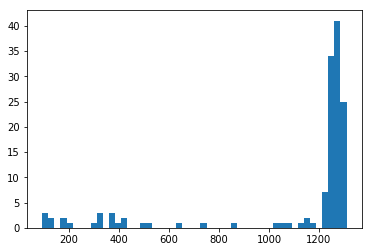

In [10]:
plt.hist(lengths, bins=50)

In [110]:
for key, sequence in features.items():
    if key[3] == 5082 or key[3] == 4933 or key[3] == 5075 or key[3] == 4285 or key[3] == 4914 or key[3] == 5117 :
        print("seq ID:", key[2],"\tSeq. length", len(sequence),"\tSGB: ", key[3])

seq ID: NFGHHBOA_01649 CRISPR-associated endonuclease Cpf1 	Seq. length 1287 	SGB:  5117
seq ID: KABKEOFJ_00516 CRISPR-associated endonuclease Cpf1 	Seq. length 1287 	SGB:  5117
seq ID: KKABKEJI_00527 CRISPR-associated endonuclease Cpf1 	Seq. length 1263 	SGB:  4933
seq ID: IJHPINHP_00577 CRISPR-associated endonuclease Cpf1 	Seq. length 1263 	SGB:  4933
seq ID: BAFDKJIF_01943 CRISPR-associated endonuclease Cpf1 	Seq. length 377 	SGB:  5075
seq ID: HNIILJJD_00112 CRISPR-associated endonuclease Cpf1 	Seq. length 1263 	SGB:  4933
seq ID: BLKIGNGG_00857 CRISPR-associated endonuclease Cpf1 	Seq. length 1259 	SGB:  4914
seq ID: JLCCKPPP_01165 CRISPR-associated endonuclease Cpf1 	Seq. length 1305 	SGB:  5075
seq ID: EFCIDPND_01072 CRISPR-associated endonuclease Cpf1 	Seq. length 1299 	SGB:  5075
seq ID: LHJBFEPI_00753 CRISPR-associated endonuclease Cpf1 	Seq. length 1288 	SGB:  5117
seq ID: PHHFEELI_00190 CRISPR-associated endonuclease Cpf1 	Seq. length 1263 	SGB:  4933
seq ID: FDAHKCME_00274

In [176]:
featuresdf["lenght"]=featuresdf["Seq"].str.len()

In [177]:
featuresdf.head()

,Genome Name,SGB ID,Seq ID,Seq Description,Seq,lenght
96,AsnicarF_2017__MV_FEM4_t1Q14__bin.2,1626,GOFDNDEG_02145,GOFDNDEG_02145 CRISPR-associated endonuclease ...,"(M, A, K, N, F, E, D, F, K, R, L, Y, P, L, S, ...",1306
128,AsnicarF_2017__MV_FEM5_t1Q14__bin.31,5117,NFGHHBOA_01649,NFGHHBOA_01649 CRISPR-associated endonuclease ...,"(M, N, N, N, T, N, N, S, L, A, P, F, I, G, G, ...",1287
144,AsnicarF_2017__MV_FEM5_t3Q15__bin.31,5117,KABKEOFJ_00516,KABKEOFJ_00516 CRISPR-associated endonuclease ...,"(M, N, N, N, T, N, N, S, L, A, P, F, I, G, G, ...",1287
203,BackhedF_2015__SID1_M__bin.29,4272,DEDIAKCJ_00748,DEDIAKCJ_00748 CRISPR-associated endonuclease ...,"(M, P, I, N, I, N, K, F, S, D, E, C, R, K, I, ...",1278
207,BackhedF_2015__SID1_M__bin.4,4348,LJEEDIKG_00997,LJEEDIKG_00997 CRISPR-associated endonuclease ...,"(M, K, E, Q, F, I, N, C, Y, P, L, S, K, T, L, ...",1227


In [18]:
groupedbyds=featuresdf.groupby(featuresdf["SGB ID"])
print("\t avg len")
groupedbySGB=groupedbyds.apply(lambda x : x["Seq"].str.len().mean()).sort_values()
print(groupedbySGB)
print("\t #")

print(featuresdf["SGB ID"].value_counts())


	 avg len
SGB ID
14263      94.000000
6367      141.000000
5045      210.000000
5868      403.000000
6140      744.000000
4328      929.000000
4933     1114.444444
5075     1132.750000
5117     1141.250000
4914     1165.800000
4447     1188.000000
4285     1203.722222
5082     1204.583333
5065     1224.000000
6308     1226.000000
4348     1227.000000
1472     1238.000000
6273     1245.000000
1903     1246.000000
4940     1259.000000
4910     1259.000000
5066     1264.000000
5111     1274.000000
4272     1280.333333
6806     1287.000000
4882     1298.000000
1626     1306.000000
dtype: float64
	 #
5082     24
5075     20
4285     18
4933     18
4914     10
5117      8
4348      4
1903      3
4272      3
4910      2
4328      2
6806      1
4940      1
5066      1
5065      1
4882      1
6273      1
5111      1
1626      1
6367      1
6308      1
5868      1
4447      1
5045      1
14263     1
6140      1
1472      1
Name: SGB ID, dtype: int64


In [381]:
[print(SGBs[SGBs["SGB ID"]==n].iloc[0][SGBs.columns[7]][-50:],"SGB\t",n) for n in featuresdf["SGB ID"].value_counts().index]#[5075,4933,4914,4285, 5117, 4348 ]]

aceae|g__Eubacterium|s__Eubacterium_eligens_CAG_72 SGB	 5082
raceae|g__Lachnospira|s__Lachnospira_pectinoschiza SGB	 5075
ccaceae|g__Ruminococcus|s__Ruminococcus_sp_CAG_108 SGB	 4285
aceae|g__Eubacterium|s__Eubacterium_rectale_CAG_36 SGB	 4933
tridiaceae|g__Clostridium|s__Clostridium_sp_CAG_91 SGB	 4914
spiraceae|g__Coprococcus|s__Coprococcus_sp_CAG_131 SGB	 5117
teriaceae|g__Eubacterium|s__Eubacterium_sp_CAG_180 SGB	 4348
eae|g__Bacteroides|s__Bacteroides_plebeius_CAG_211 SGB	 1903
teriaceae|g__Eubacterium|s__Eubacterium_sp_CAG_581 SGB	 4272
icutes_unclassified|s__Firmicutes_bacterium_CAG_65 SGB	 4910
cutes_unclassified|s__Firmicutes_bacterium_CAG_341 SGB	 4328
richaceae|g__Holdemanella|s__Holdemanella_biformis SGB	 6806
eae|g__Roseburia|s__Roseburia_inulinivorans_CAG_15 SGB	 4940
iraceae|g__Butyrivibrio|s__Butyrivibrio_sp_CAG_318 SGB	 5066
piraceae|g__Butyrivibrio|s__Butyrivibrio_crossotus SGB	 5065
chnospiraceae|g__Roseburia|s__Roseburia_sp_CAG_100 SGB	 4882
ridiaceae|g__Clostridium

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

_Coprococcus_ sp seems like an interesting one, ma c'è già in uniprot mi sa, mentre _holdemanella_ no, ma ce n'è solo una:

In [382]:
holdemanella=featuresdf[featuresdf["SGB ID"]==6806]

In [386]:
holdseq=holdemanella.iloc[0]["Seq"]
print(holdseq)
print( len(holdseq))

MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGIIAEDAVKAENQYTVKEMMDDFYRDFIDRKLDALQGINWEQLFDIMKKVKLDKNDKTSKELDKIQESIRKEIGKIFSSDPIYKDMLKADMISKILPEYIVDKYDDAASRIEAVKVFYGFAGYFIDFWASRKNIFSDTNIASAIPYRIVNENARIHMENITAFNRIAEIAGDEVAEIAEDASAYLQNMSLEDVFTGACYGEFICQKDIDRYNNICGVINQHMNQFCQNKKISRSKFKMERLHKQILCRSESGFEIPVGFQTDGEVIDAINSFSTILEEKDILNRLRTLSQEVTGYDMERIYVSSKAFESVSKYIDHKWDVIASSMYNYFSGAVRGKDDKKDAKIQTEIKKIKSCSLLDLKKLVDMYYKMDGMCLEHEATEYVAGITEILVDFNYKTFDMDDSVKMIQNEQMINEIKEYLDTYMSIYHWAKDFMIDEFVDRDMEFYSELDEIYYDLSDIVPLYNKVRNYVTQKPYSQDKIKLNFGSPTLANGWSKSKEFDNNVVVLLRDEKIYLAILNVGNKPSKDIMAGEDRRRSDTDYKKMNYYLLPGASKTLPHVFISSNAWKKSHGIPDEIMYGYNQNKHLKSSPNFDLEFCHKLIDYYKECIDSYPNYQIFNFKFAATETYNDISAFYKDVERQGYKIEWSYISEDDINQMDRDGQIYLFQIYNKDFAPNSKGMQNLHTMFLKNIFSEENLSDVVIKLNGEAELFFRKSSIQHKRGHKKGSVLVNKTYKTTEKTENGQGEIEVIESLPDQCYMELVKYWSEGGVGQLSEEASKYKDKVSHYAATMDIVKDRRYTEDKFFIHLPITINFKADNRNNVNEKVLKFIAENDDLHVIGIDRGERNLLYVSVIDSRGRIVEQKSFNIVENHESSKNVIRRHDYKGKLVNKEKYRNEARKSWKEIGKIKEIKEGYLSQVIHEISKLVLKYNAIIVMEDLNYGFKRGRFKVERQVYQKFETML

### ClustalW alignment for _Coprococcus_ sp sequences:


In [21]:
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline
from Bio.Align import AlignInfo

## Make a subset of sequences you want to align

In [286]:
datadir

'/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/'

In [378]:
subset=featuresdf[featuresdf["SGB ID"]==5117]

for i, genome in subset.iterrows():
    print("sequence length: ", len(genome.Seq), "seq ID", genome["Seq ID"])


sequence length:  1287 seq ID NFGHHBOA_01649
sequence length:  1287 seq ID KABKEOFJ_00516
sequence length:  1288 seq ID LHJBFEPI_00753
sequence length:  1288 seq ID NFDGHFHL_01430
sequence length:  1287 seq ID GIIEKPIA_00586
sequence length:  1288 seq ID HGFMGPHD_00832
sequence length:  118 seq ID OBNHPPPK_02072
sequence length:  1287 seq ID GCDOCDPP_01259


In [357]:
len(subset.iloc[-2]["Seq"])

118

In [363]:
subset=subset.drop(subset.index[-2])
print(subset.shape)

(7, 6)


In [364]:
alignments=[]
for i, genome in subset.iterrows():
    print("sequence length: ", len(genome.Seq))
    tempseq=SeqRecord(genome.Seq, id=genome["Seq ID"], description=genome["Seq ID"]+" from GENOME: "+genome["Genome Name"])
    alignments.append(tempseq)
#for key, sequence in features.items():
 #   if len(sequence)== and <=1310:  #3225nb
  #      tempseq=SeqRecord(sequence, id=key[1], description=key[2]+" from GENOME: "+key[0])
   #     alignments.append(tempseq)

filename="Coprococcus_Cpf1"
SeqIO.write(alignments, datadir+"/4exploratoryanalyses/extractcas/"+filename+".faa", "fasta")

sequence length:  1287
sequence length:  1287
sequence length:  1288
sequence length:  1288
sequence length:  1287
sequence length:  1288
sequence length:  1287


7

In [365]:

cline= ClustalwCommandline("clustalw", infile=datadir+"/4exploratoryanalyses/extractcas/"+filename+".faa", outfile=datadir+"/5extractcas/"+filename+".aln")
print(cline)


clustalw -infile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas//5extractcas/Coprococcus_Cpf1.faa -outfile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas//5extractcas/Coprococcus_Cpf1.aln


In [366]:
os.system(str(cline))

0

In [24]:
align = AlignIO.read(datadir+"/4exploratoryanalyses/extractcas/"+filename+".aln", "clustal")
print(align)

SingleLetterAlphabet() alignment with 7 rows and 1289 columns
-MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGII...RRF NFGHHBOA_01649
-MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGII...RRF KABKEOFJ_00516
-MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGII...RRF GIIEKPIA_00586
-MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGII...RRF GCDOCDPP_01259
MVGNKISNSFDSFTGINALSKTLRNELIP-SDYTKRHIAESDFI...RRF LHJBFEPI_00753
MVGNKISNSFDSFTGINALSKTLRNELIP-SDYTKRHIAESDFI...RRF HGFMGPHD_00832
MVGNKISNSFDSFTGINALSKTLRNELIP-SDYTKRHIAESDFI...RRF NFDGHFHL_01430


In [22]:
filename="Coprococcus_Cpf1"

## Consensus sequence for _Coprococcus_ sp Cpf1

In [25]:
summary_align = AlignInfo.SummaryInfo(align)
CONSENSUS_SEQUENCE=SeqRecord(summary_align.dumb_consensus(0.5), id="PROVA", description="Coprococcus Cpf1 Consensus sequence")
consensus_full_filename=datadir+"/4exploratoryanalyses/extractcas/"+filename+"_consensus.faa" #ffn
SeqIO.write(CONSENSUS_SEQUENCE, filename, "fasta")

1

In [26]:
for record in SeqIO.parse(consensus_full_filename, "fasta"):
    con=record.seq
    print(record.seq)

MXXNXXXNSXXXFXGXNXXSKTLRNELXXGSXYTXXHIXEXXXIAXDXXKXEXQYXXKEMMDDXYRDFIXXXLDXLXXIXWXXLFXXMXKXKXDKXDXTSKELXKIQXXXRKXIGKIFSSDPIYKDMLKADMISKILPEYIVDKYDDAASDRIEAVKVFYGFAGYFIDFWASRKNIFSDTNIASAIPYRIVNENARIHMENITAFNRIAEIAGDEVAEIAEDASAYLQNMSLEDVFTGACYGEFICQKDIDRYNNICGVINQHMNQFCQNKKISRSKFKMERLHKQILCRSESGFEIPVGFQTDGEVIDAINSFSTILEEKDILNRLRTLSQEVTGYDMERIYVSSKAFESVSKYIDHKWDVIASSMYNYFSGAVRGKDDKKDAKIQTEIKKIKSCSLLDLKKLVDMYYKMDGMCLEHEATEYVAGITEILVDFNYKTFDMDDSVKMIQNEQMINEIKEYLDTYMSIYHWAKDFMIDEFVDRDMEFYSELDEIYYDLSDIVPLYNKVRNYVTQKPYSQDKIKLNFGSPTLANGWSKSKEFDNNVVVLLRDEKIYLAILNVGNKPSKDIMAGEDRRRSDTDYKKMNYYLLPGASKTLPHVFISSNAWKKSHGIPDEIMYGYNQNKHLKSSPNFDLEFCHKLIDYYKECIDSYPNYQIFNFKFAATETYNDISAFYKDVERQGYKIEWSYISEDDINQMDRDGQIYLFQIYNKDFAPNSKGMQNLHTMFLKNIFSEENLSDVVIKLNGEAELFFRKSSIQHKRGHKKGSVLVNKTYKTTEKTENGQGEIEVIESLPDQCYMELVKYWSEGGVGQLSEEASKYKDKVSHYAATMDIVKDRRYTEDKFFIHLPITINFKADNRNNVNEKVLKFIAENDDLHVIGIDRGERNLLYVSVIDSRGRIVEQKSFNIVENHESSKNVIRRHDYKGKLVNKEKYRNEARKSWKEIGKIKEIKEGYLSQVIHEISKLVLKYNAIIVMEDLNYGFKRGRFKVERQVYQKFET

In [27]:
len(con)  # Sequence length

1289

## non importa:

In [371]:
alignments=[]
#for record in SeqIO.parse("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/spyrcas9.txt", "fasta"):
 #   alignments.append(SeqRecord(record.seq, id=record.id, description=record.description))
  #  break
aln_descr="Coprococcus Cpf1 consensus"
alignments.append(SeqRecord(Seq(Cas12a_seq), id=Cas12a_id, description=Cas12a_descr))
alignments.append(SeqRecord(con,id="BO", description=aln_descr))

alignmentname="Coprococcus_Cpf1_vs_Cas12a.aln"
SeqIO.write(alignments, "/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/4exploratoryanalyses/extractcas/"+alignmentname, "fasta")

cline= ClustalwCommandline("clustalw", infile="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/4exploratoryanalyses/extractcas/"+alignmentname, outfile="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5extractcas/"+alignmentname)
os.system(str(cline))

align = AlignIO.read("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/4exploratoryanalyses/extractcas/"+alignmentname, "clustal")
print(align)

summary_align = AlignInfo.SummaryInfo(align)
CONSENSUS_SEQUENCE=SeqRecord(summary_align.dumb_consensus(0.5), id="PROVA", description="Coprococcus Cpf1 vs Acidaminococcus Cas12a")
comparisonfilename="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/4exploratoryanalyses/extractcas/coprococcus_cpfs_acidaminococcus_cas12a_consensus.faa" #ffn
SeqIO.write(CONSENSUS_SEQUENCE, comparisonfilename, "fasta")

for record in SeqIO.parse(comparisonfilename, "fasta"):
    con=record.seq
    print(record.seq)

SingleLetterAlphabet() alignment with 2 rows and 1370 columns
------MTQFEGFTNLYQVSKTLRFELIPQG-KTLKHIQEQGFI...LRN sp|U2UMQ6|CS12A_ACISB
MXXNXXXNSXXXFXGXNXXSKTLRNELXXGSXYTXXHIXEXXXI...RRF BO
MXXNXXXXXXXXFXXXXXXSKTLRXELXXXXXXTXXHIXEXXXIXXDXXXXXXXXXXKXXXDXXYXXXXXXXLXXLXXXXWXXLXXXXXXXXXXKXXXTXXXLXXXQXXXRXXIXXXFXGRTDNLTDAINKRXXXIYKXXXKAXXXXXXXXXXXXXXXXXXXXXRIXXXXXFXXFXXYFXXFXXXRKNXFSXXXIXXAIPXRIVXXNXXXXXENXXXFXRXXXXXXSLXEXXEXXXXAXXXXXXXSXEXVFXXXXYXXXXXQXXIDXYNXXXGGISREAGTEKIKXXNXXXNXXXQXXXETAHIIXXXXXXXXXLXKQILXXXXXXXXIXXXFXXDXEVIXXXXXXXTXLXXXXXLXXXXXLXXEXXXXDXXXIXXSXKXXEXXSXXXXXXWDXXXXXXYXXXXXXXXGKXXKXDAKXXXXXXXXXXXXXXXLXXXXXXXXKXXXXXXXXXXXEXXXXXXXXLXXXXXXTXXXXXXXXXXXXEQMINEIKEXLDXXXXXYHXXXXFXXDEXXXXDXEFXXXLXXIXXXXXXXXXXYNKXRNYXTXKPYSXXKXKLNFXXPTLAXGWXXXKEXXNXXXXXXXXXXXYLXIXXXGXKXXXXXXXXEXXXXXXXXXXKMXYXXXPXAXKXXPKCSTQLKAVTAHFQTHTXXXXXSNXXXXXXXIXXEIXXXXNXXKXXKKFQTAYAKKTXXXXXXXEXXXKXIDXXXXXXXXYXXXXXXXXXSXXXXXXYXDXXXXYXXXXXXXYXIXXXXIXEXXIXXXXXXGXXYLFQIYNKDFAXXXXGXXNLHTXXXXXXFSXENLXXXXIKLNGXAELF

# pairwise allignment with Acidaminococcus Cas12a

In [28]:
Cas12a_id= "sp|U2UMQ6|CS12A_ACISB"
Cas12a_descr="CRISPR-associated endonuclease Cas12a OS=Acidaminococcus sp. (strain BV3L6) OX=1111120 GN=cas12a PE=1 SV=1"
Cas12a_seq="MTQFEGFTNLYQVSKTLRFELIPQGKTLKHIQEQGFIEEDKARNDHYKELKPIIDRIYKTYADQCLQLVQLDWENLSAAIDSYRKEKTEETRNALIEEQATYRNAIHDYFIGRTDNLTDAINKRHAEIYKGLFKAELFNGKVLKQLGTVTTTEHENALLRSFDKFTTYFSGFYENRKNVFSAEDISTAIPHRIVQDNFPKFKENCHIFTRLITAVPSLREHFENVKKAIGIFVSTSIEEVFSFPFYNQLLTQTQIDLYNQLLGGISREAGTEKIKGLNEVLNLAIQKNDETAHIIASLPHRFIPLFKQILSDRNTLSFILEEFKSDEEVIQSFCKYKTLLRNENVLETAEALFNELNSIDLTHIFISHKKLETISSALCDHWDTLRNALYERRISELTGKITKSAKEKVQRSLKHEDINLQEIISAAGKELSEAFKQKTSEILSHAHAALDQPLPTTLKKQEEKEILKSQLDSLLGLYHLLDWFAVDESNEVDPEFSARLTGIKLEMEPSLSFYNKARNYATKKPYSVEKFKLNFQMPTLASGWDVNKEKNNGAILFVKNGLYYLGIMPKQKGRYKALSFEPTEKTSEGFDKMYYDYFPDAAKMIPKCSTQLKAVTAHFQTHTTPILLSNNFIEPLEITKEIYDLNNPEKEPKKFQTAYAKKTGDQKGYREALCKWIDFTRDFLSKYTKTTSIDLSSLRPSSQYKDLGEYYAELNPLLYHISFQRIAEKEIMDAVETGKLYLFQIYNKDFAKGHHGKPNLHTLYWTGLFSPENLAKTSIKLNGQAELFYRPKSRMKRMAHRLGEKMLNKKLKDQKTPIPDTLYQELYDYVNHRLSHDLSDEARALLPNVITKEVSHEIIKDRRFTSDKFFFHVPITLNYQAANSPSKFNQRVNAYLKEHPETPIIGIDRGERNLIYITVIDSTGKILEQRSLNTIQQFDYQKKLDNREKERVAARQAWSVVGTIKDLKQGYLSQVIHEIVDLMIHYQAVVVLENLNFGFKSKRTGIAEKAVYQQFEKMLIDKLNCLVLKDYPAEKVGGVLNPYQLTDQFTSFAKMGTQSGFLFYVPAPYTSKIDPLTGFVDPFVWKTIKNHESRKHFLEGFDFLHYDVKTGDFILHFKMNRNLSFQRGLPGFMPAWDIVFEKNETQFDAKGTPFIAGKRIVPVIENHRFTGRYRDLYPANELIALLEEKGIVFRDGSNILPKLLENDDSHAIDTMVALIRSVLQMRNSNAATGEDYINSPVRDLNGVCFDSRFQNPEWPMDADANGAYHIALKGQLLLNHLKESKDLKLQNGISNQDWLAYIQELRN"

len(Cas12a_seq)

1307

In [29]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx(con, Cas12a_seq)

In [30]:
print(pairwise2.format_alignment(*alignments[0]))

MXXNXXXNSXXX--FX-GX--NXX----SKTLRN-ELXX---GSXY-TXX--HIX-EXXX---IAX--DXXKXEXQ-----YXXKEMMD-----DXYRDFIXXXL-----DX--LXXIXWXX-LFXXMXKXKX---DKX--------DXTS--KELXK--------I--QXXX---RKXIGK--IFSS-DPIYK-----DM-LKA-DM-IS-K----I---LP---EYI-----VD-KYDDA------------A---S-DRIEAVKVF--YGFA-GYFIDFWAS---RKNI-FS--DTNIAS-AIPY-RIV--N-----ENARI-HMENITAFN-R-I-A-----EIAGD--E-V--AEIAEDA----SAYLQNM-SL-ED-VFTGACYGE-FICQKDIDR--YNNICGVINQHMN---QFC-Q----NKK-----ISRS-----KF-KM---ER-LHK----Q-------I---LC--RSESGFEIPVG-F-QTDGEVI--DAI-N--SFSTILEE-K-D---I--------LNRLRTLSQ-E-V--TGYDM-ERIYVSSKA-F-ESV--SKYID--HKWDVIA--S-------SMYNYFSGAVRGKD--DKK--DAKIQT------E--IK-----KI-KSCSLLDL-K-KLVDMYY----KM--DGMC--LEH-E---ATEYVAGIT-EILVD---FNYK--TFDMDDSVKM-I---------QNE--------QMINEI-KEY-L----DTYMSI----YHWAK--D-FMI--DEF---VDRDM-EFYSE--LDE--IYYD-LSDIV---P-L--YNKV-RNYV-TQK-PYSQD--KI-KLNFGS--PTLAN-GWSKSKEFDNNVVVLLRD--EKIYL---AILN-VGNKPSKD-------IMA----GEDRRR----SD---TDY-K------KMNYYLL---PG-AS-K------T-LPH--VFISSN-AWKKSHGIPDEIMYGYN-QNK-H-

In [31]:
# let's check the score for the allignment of Cas12a with itself
alignments = pairwise2.align.globalxx(Cas12a_seq, Cas12a_seq)
print(pairwise2.format_alignment(*alignments[0]))

MTQFEGFTNLYQVSKTLRFELIPQGKTLKHIQEQGFIEEDKARNDHYKELKPIIDRIYKTYADQCLQLVQLDWENLSAAIDSYRKEKTEETRNALIEEQATYRNAIHDYFIGRTDNLTDAINKRHAEIYKGLFKAELFNGKVLKQLGTVTTTEHENALLRSFDKFTTYFSGFYENRKNVFSAEDISTAIPHRIVQDNFPKFKENCHIFTRLITAVPSLREHFENVKKAIGIFVSTSIEEVFSFPFYNQLLTQTQIDLYNQLLGGISREAGTEKIKGLNEVLNLAIQKNDETAHIIASLPHRFIPLFKQILSDRNTLSFILEEFKSDEEVIQSFCKYKTLLRNENVLETAEALFNELNSIDLTHIFISHKKLETISSALCDHWDTLRNALYERRISELTGKITKSAKEKVQRSLKHEDINLQEIISAAGKELSEAFKQKTSEILSHAHAALDQPLPTTLKKQEEKEILKSQLDSLLGLYHLLDWFAVDESNEVDPEFSARLTGIKLEMEPSLSFYNKARNYATKKPYSVEKFKLNFQMPTLASGWDVNKEKNNGAILFVKNGLYYLGIMPKQKGRYKALSFEPTEKTSEGFDKMYYDYFPDAAKMIPKCSTQLKAVTAHFQTHTTPILLSNNFIEPLEITKEIYDLNNPEKEPKKFQTAYAKKTGDQKGYREALCKWIDFTRDFLSKYTKTTSIDLSSLRPSSQYKDLGEYYAELNPLLYHISFQRIAEKEIMDAVETGKLYLFQIYNKDFAKGHHGKPNLHTLYWTGLFSPENLAKTSIKLNGQAELFYRPKSRMKRMAHRLGEKMLNKKLKDQKTPIPDTLYQELYDYVNHRLSHDLSDEARALLPNVITKEVSHEIIKDRRFTSDKFFFHVPITLNYQAANSPSKFNQRVNAYLKEHPETPIIGIDRGERNLIYITVIDSTGKILEQRSLNTIQQFDYQKKLDNREKERVAARQAWSVVGTIKDLKQGYLSQVIHEIVDLMIHYQAVVVLENLNFGFK

In [32]:
577/1307

0.441469013006886

In [ ]:
# alignmente score is pretty low